In [37]:
# Import library yang diperlukan
import pandas as pd

# Membaca dataset
url = "https://raw.githubusercontent.com/m-azhar09/CAKAP_Capstone_Project/refs/heads/main/garments_worker_productivity.csv"  # Ganti dengan URL atau path ke file CSV Anda
data = pd.read_csv(url)

# 1. Cek struktur data
print("Struktur Data:")
print(data.info())  # Menampilkan informasi kolom, tipe data, dan nilai non-null

# 2. Cek dimensi data
print("\nDimensi Data:")
print(f"Jumlah baris: {data.shape[0]}")
print(f"Jumlah kolom: {data.shape[1]}")

# 3. Cek apakah ada nilai yang hilang
print("\nCek Nilai Hilang:")
print(data.isnull().sum())  # Menampilkan jumlah nilai yang hilang di setiap kolom

Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   fl

In [38]:
import pandas as pd

# Load your dataset (assuming you already have it in 'data')
file_path = 'https://raw.githubusercontent.com/m-azhar09/CAKAP_Capstone_Project/refs/heads/main/garments_worker_productivity.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Step 1: Make a copy of the dataset to avoid altering the original
cleaned_data = data.copy()

# Step 2: Convert the 'date' column to datetime format
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'], format='%m/%d/%Y', errors='coerce')

# Step 3: Standardize the 'department' column (fix typos like "sweing" -> "sewing")
cleaned_data['department'] = cleaned_data['department'].str.strip().str.lower()
cleaned_data['department'] = cleaned_data['department'].replace({'sweing': 'sewing'})

# Step 4: Convert relevant columns to categorical types
categorical_columns = ['quarter', 'department', 'day', 'team']
for col in categorical_columns:
    cleaned_data[col] = cleaned_data[col].astype('category')

# Step 5: Handle missing values in the 'wip' column (Work-in-Progress)
# Filling missing values in 'wip' with the column's median as it's a numerical column
cleaned_data['wip'] = cleaned_data['wip'].fillna(cleaned_data['wip'].median())

# Step 6: Check for and remove any duplicates
cleaned_data = cleaned_data.drop_duplicates()

# Step 7: Validate ranges and outliers for numeric columns
# Ensuring all numeric columns have non-negative values as negatives might be invalid for this dataset
numeric_columns = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
                   'idle_time', 'no_of_style_change', 'no_of_workers', 'actual_productivity']

# Replace negative values with NaN for further inspection or filling
for col in numeric_columns:
    cleaned_data[col] = cleaned_data[col].apply(lambda x: x if x >= 0 else None)

# Step 8: Save the cleaned dataset for better analysis
cleaned_data.to_csv('cleaned_garments_worker_productivity.csv', index=False)

# Display the cleaned dataset summary
print(cleaned_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   category      
 2   department             1197 non-null   category      
 3   day                    1197 non-null   category      
 4   team                   1197 non-null   category      
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [39]:
# Menampilkan ringkasan dataset setelah pembersihan
print("Struktur Data Setelah Pembersihan:")
print(cleaned_data.info())

# Menampilkan jumlah nilai yang hilang (missing values) di setiap kolom
print("\nJumlah Missing Values Setelah Pembersihan:")
print(cleaned_data.isnull().sum())

# Menampilkan statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif untuk Kolom Numerik:")
print(cleaned_data.describe())

# Menampilkan 5 baris pertama dari dataset yang telah dibersihkan
print("\n5 Baris Pertama Dataset Setelah Pembersihan:")
print(cleaned_data.head())

# Menampilkan dimensi dataset
print("\nDimensi Dataset Setelah Pembersihan:")
print(f"Jumlah Baris: {cleaned_data.shape[0]}")
print(f"Jumlah Kolom: {cleaned_data.shape[1]}")


Struktur Data Setelah Pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   category      
 2   department             1197 non-null   category      
 3   day                    1197 non-null   category      
 4   team                   1197 non-null   category      
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197

Outliers in targeted_productivity: 79
Outlier Detection for targeted_productivity: Lower Bound = 0.5499999999999998, Upper Bound = 0.9500000000000002
Outliers in smv: 1
Outlier Detection for smv: Lower Bound = -25.685, Upper Bound = 53.315
Outliers in wip: 355
Outlier Detection for wip: Lower Bound = 835.5, Upper Bound = 1231.5
Outliers in over_time: 2
Outlier Detection for over_time: Lower Bound = -6360.0, Upper Bound = 13800.0
Outliers in incentive: 15
Outlier Detection for incentive: Lower Bound = -67.5, Upper Bound = 112.5
Outliers in idle_time: 3
Outlier Detection for idle_time: Lower Bound = 0.0, Upper Bound = 0.0
Outliers in no_of_style_change: 52
Outlier Detection for no_of_style_change: Lower Bound = 0.0, Upper Bound = 0.0
Outliers in no_of_workers: 1
Outlier Detection for no_of_workers: Lower Bound = -31.0, Upper Bound = 73.0
Outliers in actual_productivity: 29
Outlier Detection for actual_productivity: Lower Bound = 0.3633593755, Upper Bound = 1.1860677075


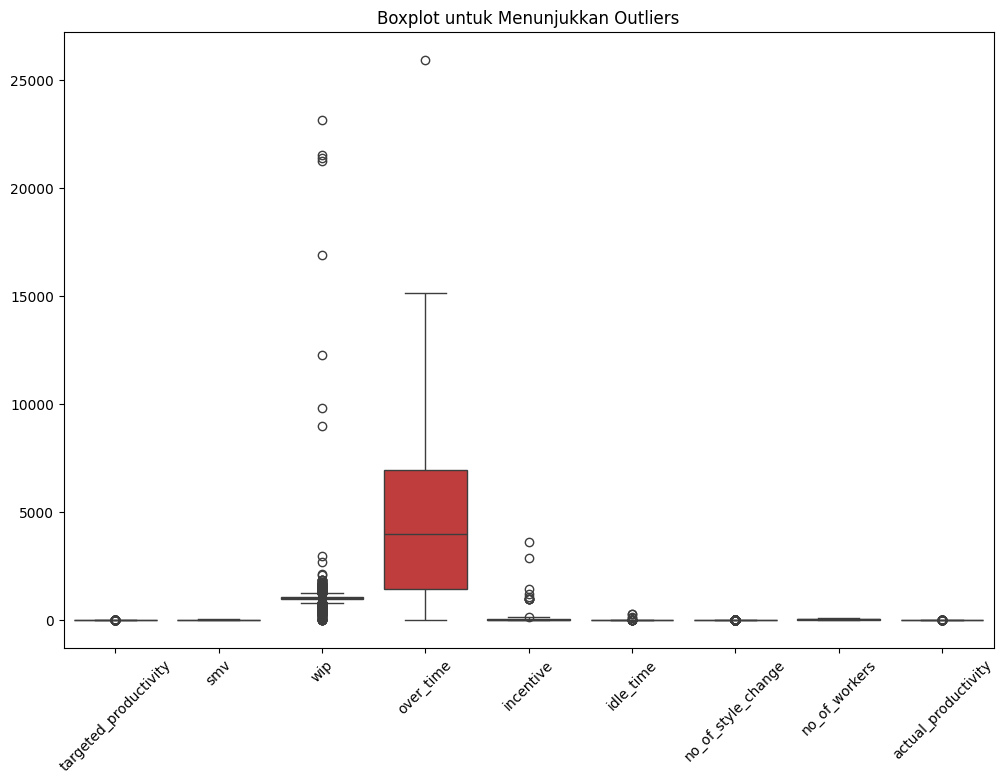

Jumlah Outlier yang Ditemukan per Kolom:
{'targeted_productivity': 79, 'smv': 1, 'wip': 355, 'over_time': 2, 'incentive': 15, 'idle_time': 3, 'no_of_style_change': 52, 'no_of_workers': 1, 'actual_productivity': 29}
<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   660 non-null    datetime64[ns]
 1   quarter                660 non-null    category      
 2   department             660 non-null    category      
 3   day                    660 non-null    category      
 4   team                   660 non-null    category      
 5   targeted_productivity  660 non-null    float64       
 6   smv                    660 non-null    float64       
 7   wip                    660 non-null    float64       
 8   over_time              660 non-null    int64         
 9   incentive              660 non

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan data sudah dimuat dalam dataframe 'cleaned_data'

# Pilih kolom numerik yang ingin diperiksa untuk outlier
numeric_columns = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
                   'idle_time', 'no_of_style_change', 'no_of_workers', 'actual_productivity']

# Fungsi untuk mendeteksi dan menangani outlier menggunakan IQR
def detect_and_handle_outliers(df, columns):
    outlier_info = {}

    # Deteksi outlier menggunakan IQR
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Tentukan batas bawah dan batas atas untuk outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifikasi outlier
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_info[col] = outliers.shape[0]

        # Menghapus outlier
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

        # Menyaring outlier
        print(f"Outliers in {col}: {outlier_info[col]}")
        print(f"Outlier Detection for {col}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

    return df, outlier_info

# Deteksi dan tangani outlier
cleaned_data_no_outliers, outliers_detected = detect_and_handle_outliers(cleaned_data, numeric_columns)

# Visualisasi boxplot untuk melihat outlier
plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_data[numeric_columns])
plt.title('Boxplot untuk Menunjukkan Outliers')
plt.xticks(rotation=45)
plt.show()

# Tampilkan hasil deteksi outlier
print("Jumlah Outlier yang Ditemukan per Kolom:")
print(outliers_detected)

# Tampilkan dataset yang sudah tanpa outlier
print(f"Data setelah menghapus outlier:\n{cleaned_data_no_outliers.info()}")


Outliers in targeted_productivity: 79
Outlier Detection for targeted_productivity: Lower Bound = 0.5499999999999998, Upper Bound = 0.9500000000000002
Outliers in smv: 1
Outlier Detection for smv: Lower Bound = -25.685, Upper Bound = 53.315
Outliers in wip: 355
Outlier Detection for wip: Lower Bound = 835.5, Upper Bound = 1231.5
Outliers in over_time: 2
Outlier Detection for over_time: Lower Bound = -6360.0, Upper Bound = 13800.0
Outliers in incentive: 15
Outlier Detection for incentive: Lower Bound = -67.5, Upper Bound = 112.5
Outliers in idle_time: 3
Outlier Detection for idle_time: Lower Bound = 0.0, Upper Bound = 0.0
Outliers in no_of_style_change: 52
Outlier Detection for no_of_style_change: Lower Bound = 0.0, Upper Bound = 0.0
Outliers in no_of_workers: 1
Outlier Detection for no_of_workers: Lower Bound = -31.0, Upper Bound = 73.0
Outliers in actual_productivity: 29
Outlier Detection for actual_productivity: Lower Bound = 0.3633593755, Upper Bound = 1.1860677075


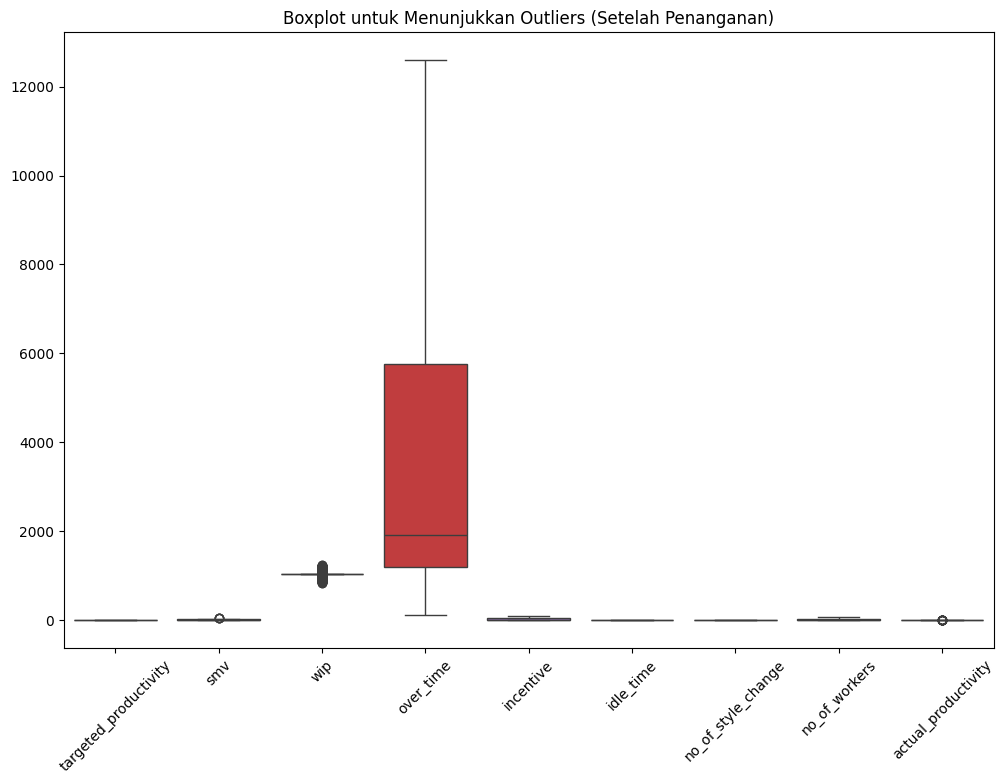

Jumlah Outlier yang Ditemukan per Kolom:
{'targeted_productivity': 79, 'smv': 1, 'wip': 355, 'over_time': 2, 'incentive': 15, 'idle_time': 3, 'no_of_style_change': 52, 'no_of_workers': 1, 'actual_productivity': 29}
<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   660 non-null    datetime64[ns]
 1   quarter                660 non-null    category      
 2   department             660 non-null    category      
 3   day                    660 non-null    category      
 4   team                   660 non-null    category      
 5   targeted_productivity  660 non-null    float64       
 6   smv                    660 non-null    float64       
 7   wip                    660 non-null    float64       
 8   over_time              660 non-null    int64         
 9   incentive              660 non

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan data sudah dimuat dalam dataframe 'cleaned_data'

# Pilih kolom numerik yang ingin diperiksa untuk outlier
numeric_columns = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
                   'idle_time', 'no_of_style_change', 'no_of_workers', 'actual_productivity']

# Fungsi untuk mendeteksi dan menangani outlier menggunakan IQR
def detect_and_handle_outliers(df, columns):
    outlier_info = {}

    # Deteksi outlier menggunakan IQR
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Tentukan batas bawah dan batas atas untuk outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifikasi outlier
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_info[col] = outliers.shape[0]

        # Menghapus outlier
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

        # Menyaring outlier
        print(f"Outliers in {col}: {outlier_info[col]}")
        print(f"Outlier Detection for {col}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

    return df, outlier_info

# Deteksi dan tangani outlier
cleaned_data_no_outliers, outliers_detected = detect_and_handle_outliers(cleaned_data, numeric_columns)

# Visualisasi boxplot untuk data setelah menangani outlier
plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_data_no_outliers[numeric_columns])  # Visualisasi boxplot setelah menangani outlier
plt.title('Boxplot untuk Menunjukkan Outliers (Setelah Penanganan)')
plt.xticks(rotation=45)
plt.show()

# Tampilkan hasil deteksi outlier
print("Jumlah Outlier yang Ditemukan per Kolom:")
print(outliers_detected)

# Tampilkan dataset yang sudah tanpa outlier
print(f"Data setelah menghapus outlier:\n{cleaned_data_no_outliers.info()}")


Jumlah outlier pada kolom wip sebelum penanganan: 358
Jumlah outlier pada kolom wip setelah penanganan: 0
Jumlah outlier pada kolom actual_productivity sebelum penanganan: 54
Jumlah outlier pada kolom actual_productivity setelah penanganan: 0


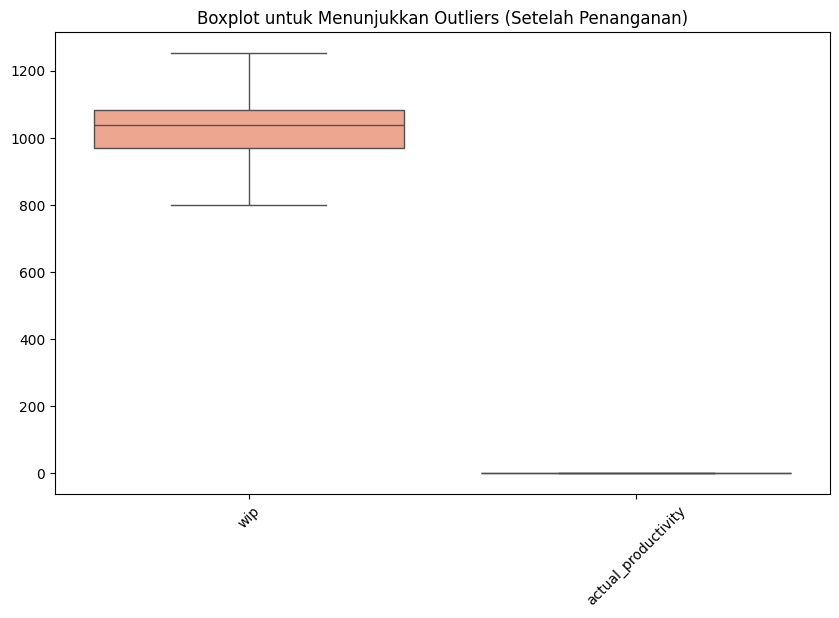

In [42]:
# Import library yang dibutuhkan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Kolom yang ingin dicek dan ditangani outliernya
columns_to_check = ['wip', 'actual_productivity']

# Menentukan batas outlier berdasarkan IQR dan melakukan Winsorizing
for col in columns_to_check:
    # Menghitung Q1, Q3, dan IQR
    Q1 = cleaned_data[col].quantile(0.25)  # Kuartil pertama
    Q3 = cleaned_data[col].quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1                          # Rentang antar-kuartil

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menampilkan jumlah outlier sebelum penanganan
    outliers = cleaned_data[(cleaned_data[col] < lower_bound) | (cleaned_data[col] > upper_bound)]
    print(f"Jumlah outlier pada kolom {col} sebelum penanganan: {len(outliers)}")

    # Winsorizing: mengganti nilai outlier dengan batas wajar
    cleaned_data[col] = np.where(cleaned_data[col] < lower_bound, lower_bound, cleaned_data[col])
    cleaned_data[col] = np.where(cleaned_data[col] > upper_bound, upper_bound, cleaned_data[col])

    # Menampilkan jumlah outlier setelah penanganan
    outliers_after = cleaned_data[(cleaned_data[col] < lower_bound) | (cleaned_data[col] > upper_bound)]
    print(f"Jumlah outlier pada kolom {col} setelah penanganan: {len(outliers_after)}")

# Visualisasi ulang menggunakan boxplot untuk memastikan outlier sudah tertangani
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data[columns_to_check], palette="Reds")
plt.title("Boxplot untuk Menunjukkan Outliers (Setelah Penanganan)")
plt.xticks(rotation=45)
plt.show()


Tipe Data Kolom:
date                     datetime64[ns]
quarter                        category
department                     category
day                            category
team                           category
targeted_productivity           float64
smv                             float64
wip                             float64
over_time                         int64
incentive                         int64
idle_time                       float64
idle_men                          int64
no_of_style_change                int64
no_of_workers                   float64
actual_productivity             float64
dtype: object

Kolom target 'actual_productivity' adalah numerik.

Korelasi dengan Kolom Target:
targeted_productivity: 0.426
smv: -0.129
wip: 0.160
over_time: -0.062
incentive: 0.078
idle_time: -0.084
idle_men: -0.176
no_of_style_change: -0.211
no_of_workers: -0.065

Visualisasi Korelasi dengan Target:


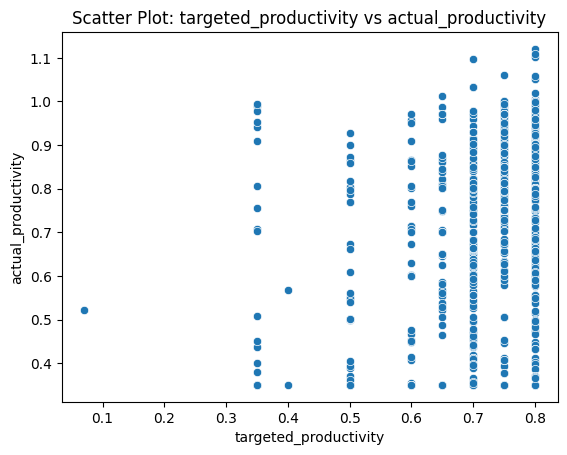

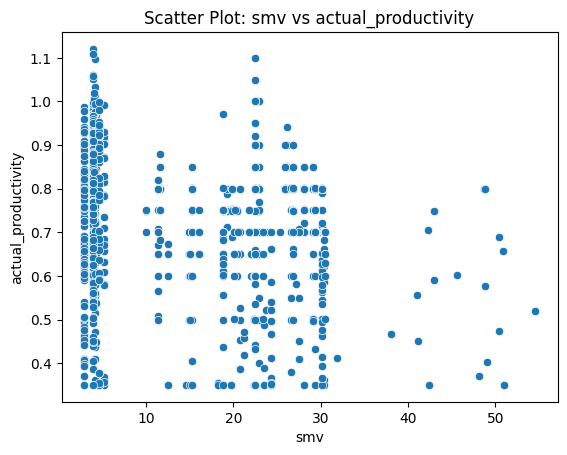

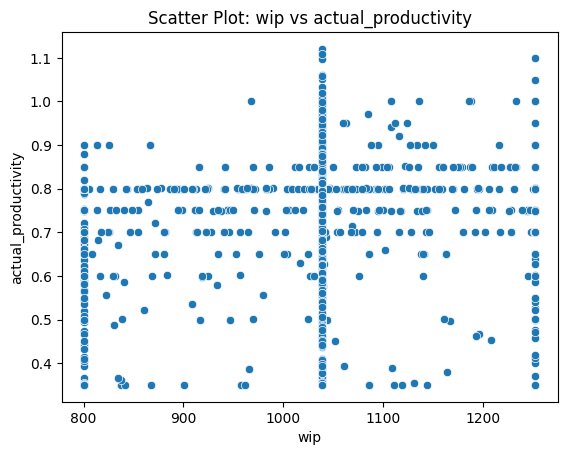

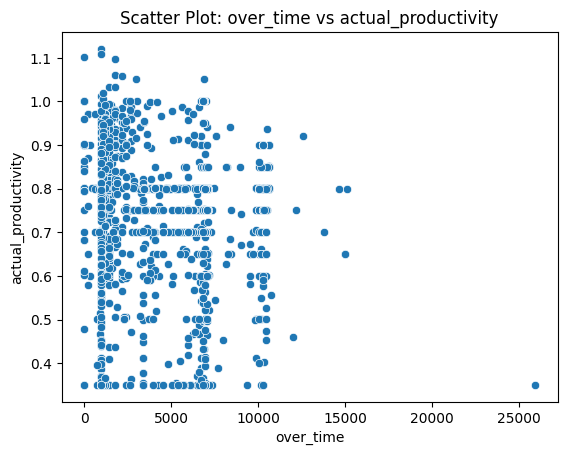

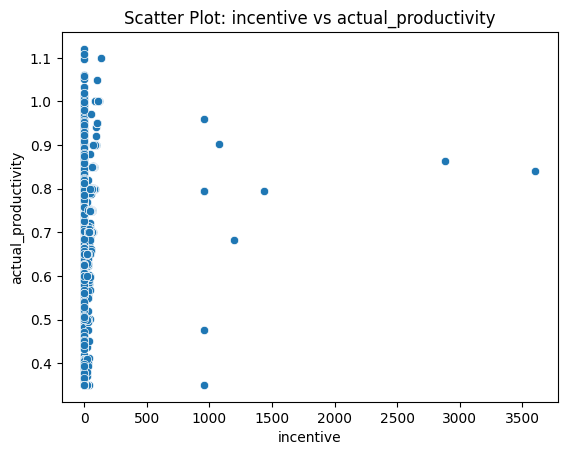

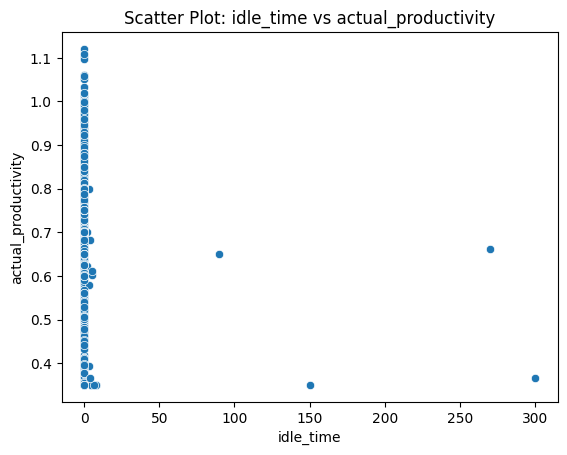

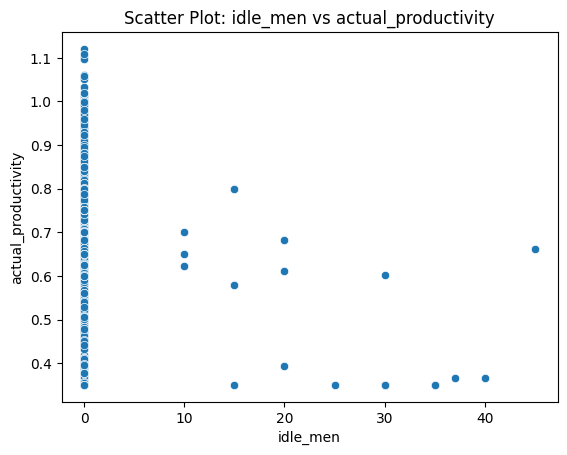

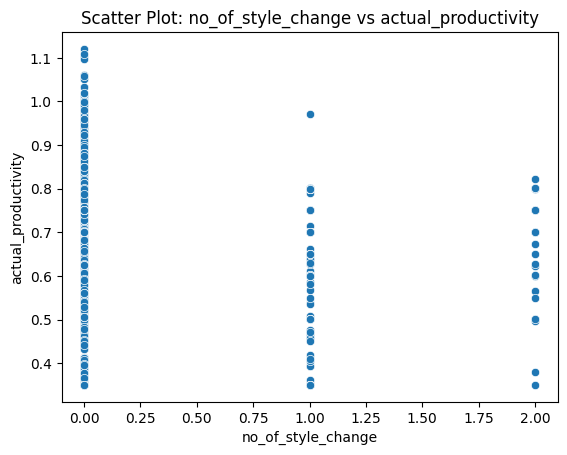

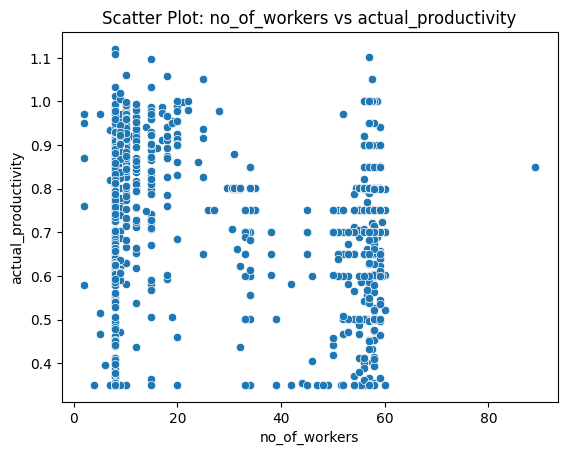


Heatmap Korelasi antara Prediktor:


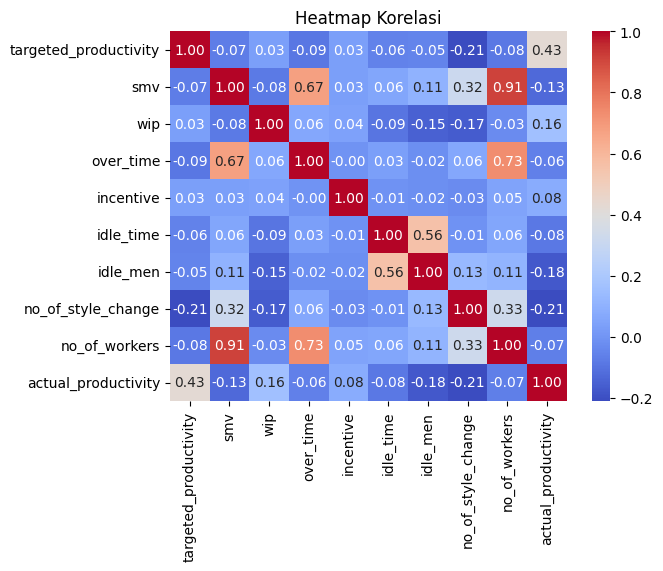


Jumlah Nilai Hilang:
date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

Distribusi Kolom Target:


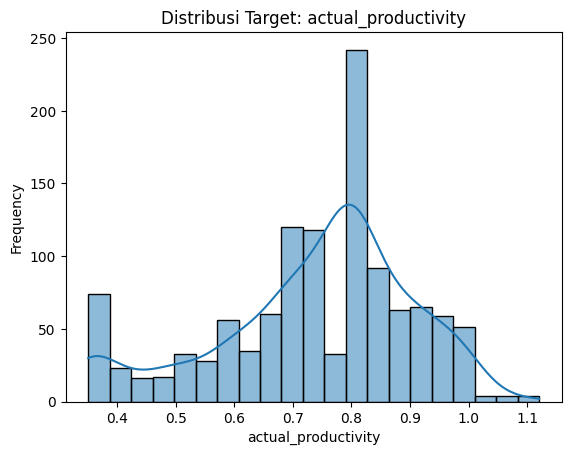

In [43]:
# Import library yang diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# 1. Periksa tipe data dari target dan prediktor
print("Tipe Data Kolom:")
print(cleaned_data.dtypes)

# Pastikan kolom target bersifat numerik
target_column = 'actual_productivity'  # Ganti dengan kolom target Anda
if np.issubdtype(cleaned_data[target_column].dtype, np.number):
    print(f"\nKolom target '{target_column}' adalah numerik.")
else:
    print(f"\nKolom target '{target_column}' bukan numerik, regresi mungkin tidak cocok.")

# 2. Periksa korelasi antara target dan prediktor numerik
numerical_columns = cleaned_data.select_dtypes(include=[np.number]).columns
print("\nKorelasi dengan Kolom Target:")
correlation_results = {}
for col in numerical_columns:
    if col != target_column:
        corr, _ = pearsonr(cleaned_data[col].dropna(), cleaned_data[target_column].dropna())
        correlation_results[col] = corr
        print(f"{col}: {corr:.3f}")

# 3. Visualisasi hubungan target dengan beberapa prediktor
print("\nVisualisasi Korelasi dengan Target:")
for col in numerical_columns:
    if col != target_column:
        sns.scatterplot(data=cleaned_data, x=col, y=target_column)
        plt.title(f"Scatter Plot: {col} vs {target_column}")
        plt.xlabel(col)
        plt.ylabel(target_column)
        plt.show()

# 4. Periksa multikolinearitas antara prediktor menggunakan heatmap
print("\nHeatmap Korelasi antara Prediktor:")
correlation_matrix = cleaned_data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

# 5. Periksa jumlah nilai hilang
print("\nJumlah Nilai Hilang:")
print(cleaned_data.isnull().sum())

# 6. Periksa distribusi kolom target
print("\nDistribusi Kolom Target:")
sns.histplot(cleaned_data[target_column], kde=True)
plt.title(f"Distribusi Target: {target_column}")
plt.xlabel(target_column)
plt.ylabel("Frequency")
plt.show()


<ipython-input-44-a8448b2be62b>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cleaned_data, x='date', y='actual_productivity', ci=None)


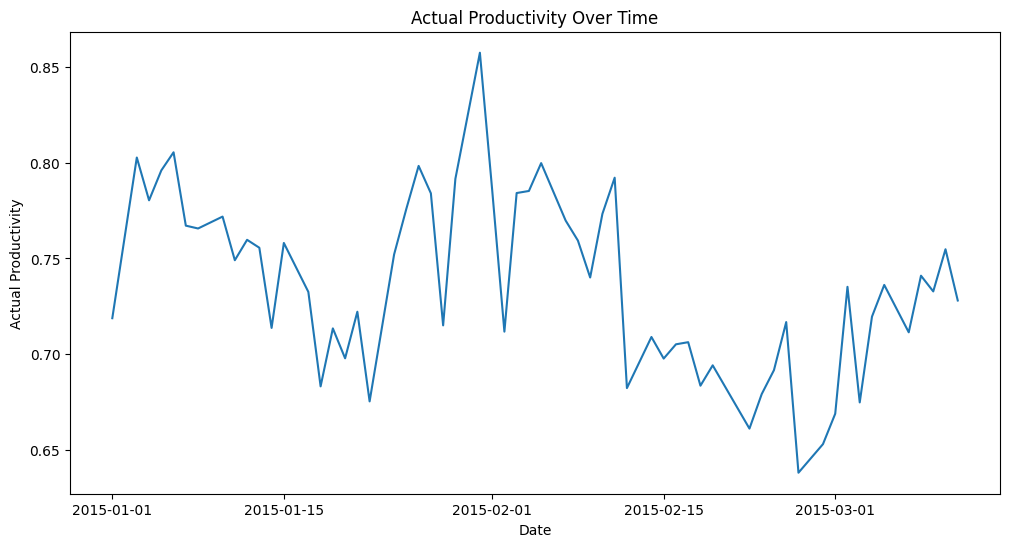

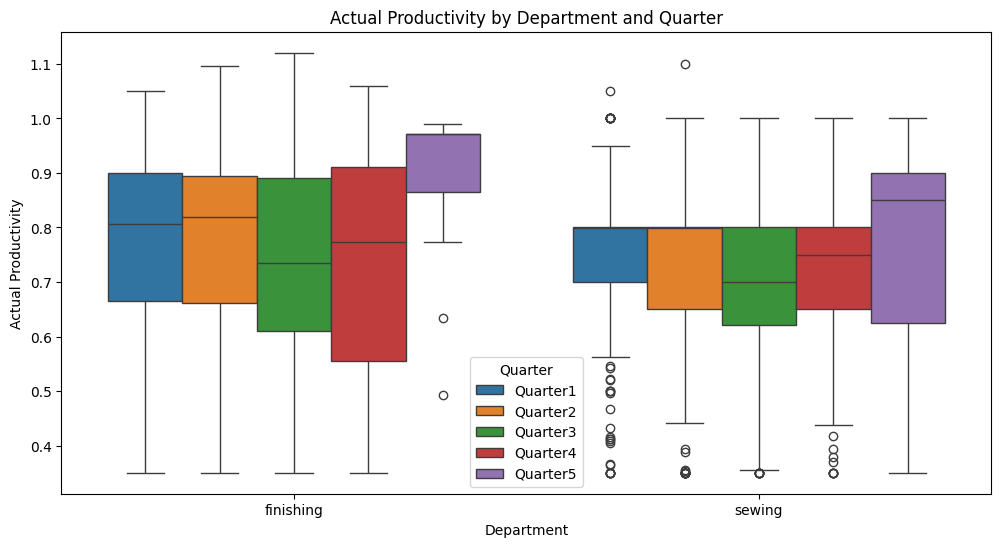

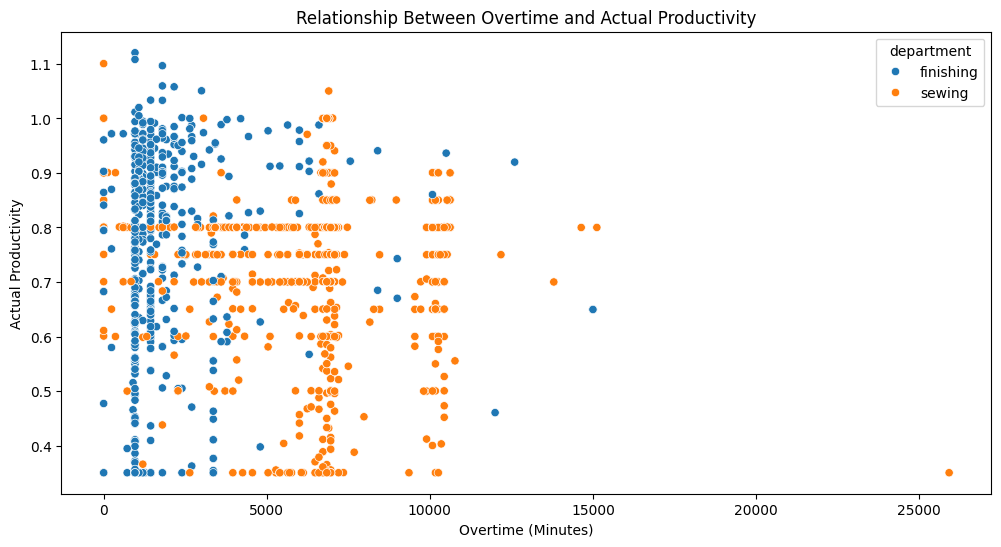

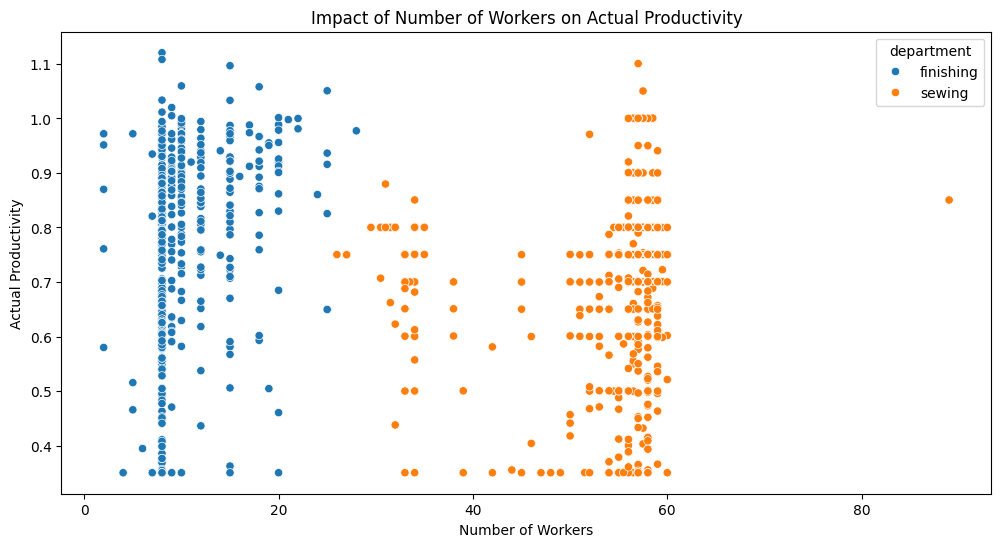

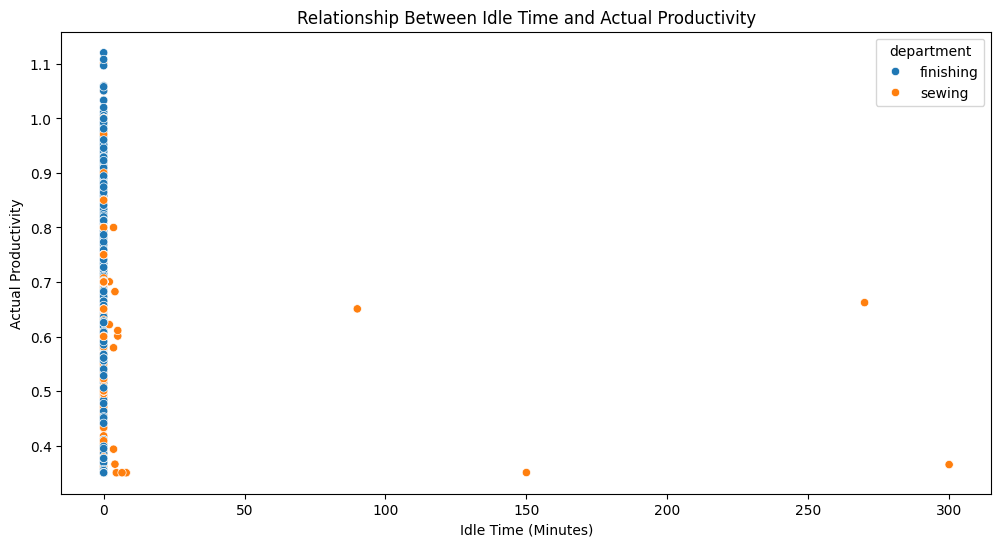

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cleaned_data' is your cleaned dataset

# 1. Trend: Actual Productivity over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=cleaned_data, x='date', y='actual_productivity', ci=None)
plt.title('Actual Productivity Over Time')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.show()

# 2. Productivity vs Targeted Productivity by Department
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_data, x='department', y='actual_productivity', hue='quarter')
plt.title('Actual Productivity by Department and Quarter')
plt.xlabel('Department')
plt.ylabel('Actual Productivity')
plt.legend(title='Quarter')
plt.show()

# 3. Relationship between Overtime and Actual Productivity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_data, x='over_time', y='actual_productivity', hue='department')
plt.title('Relationship Between Overtime and Actual Productivity')
plt.xlabel('Overtime (Minutes)')
plt.ylabel('Actual Productivity')
plt.show()

# 4. Worker Count and its impact on productivity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_data, x='no_of_workers', y='actual_productivity', hue='department')
plt.title('Impact of Number of Workers on Actual Productivity')
plt.xlabel('Number of Workers')
plt.ylabel('Actual Productivity')
plt.show()

# 5. Idle Time and Actual Productivity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_data, x='idle_time', y='actual_productivity', hue='department')
plt.title('Relationship Between Idle Time and Actual Productivity')
plt.xlabel('Idle Time (Minutes)')
plt.ylabel('Actual Productivity')
plt.show()


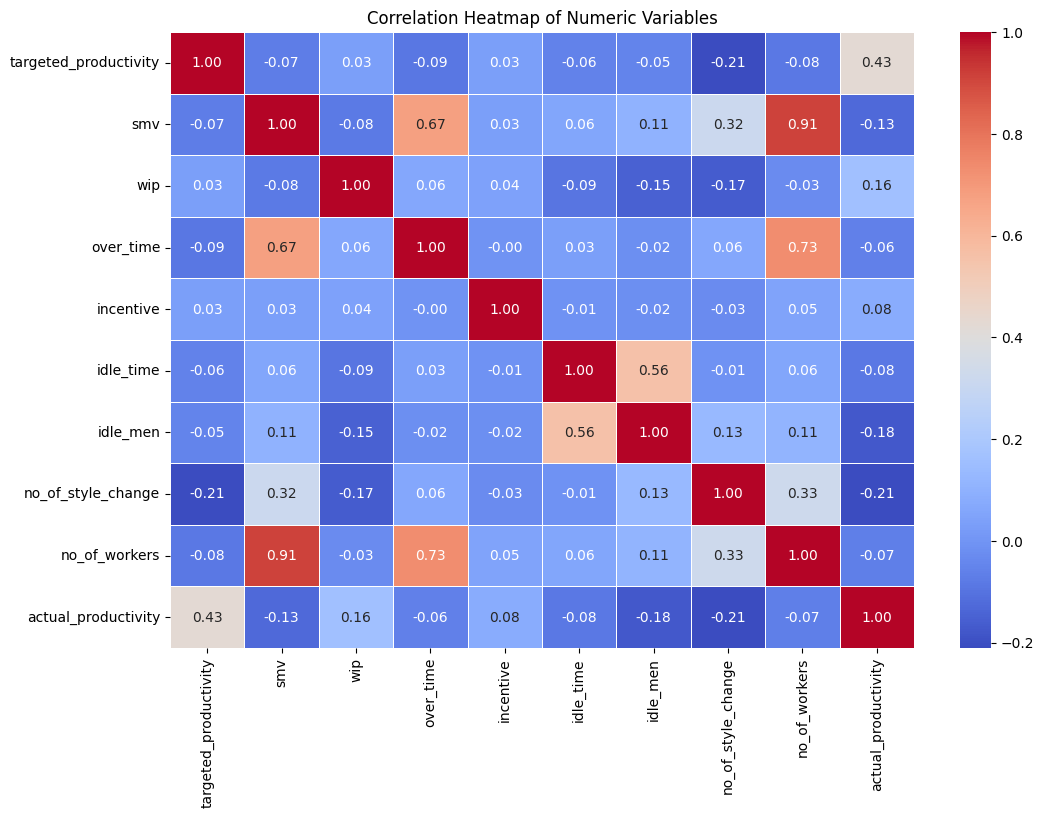

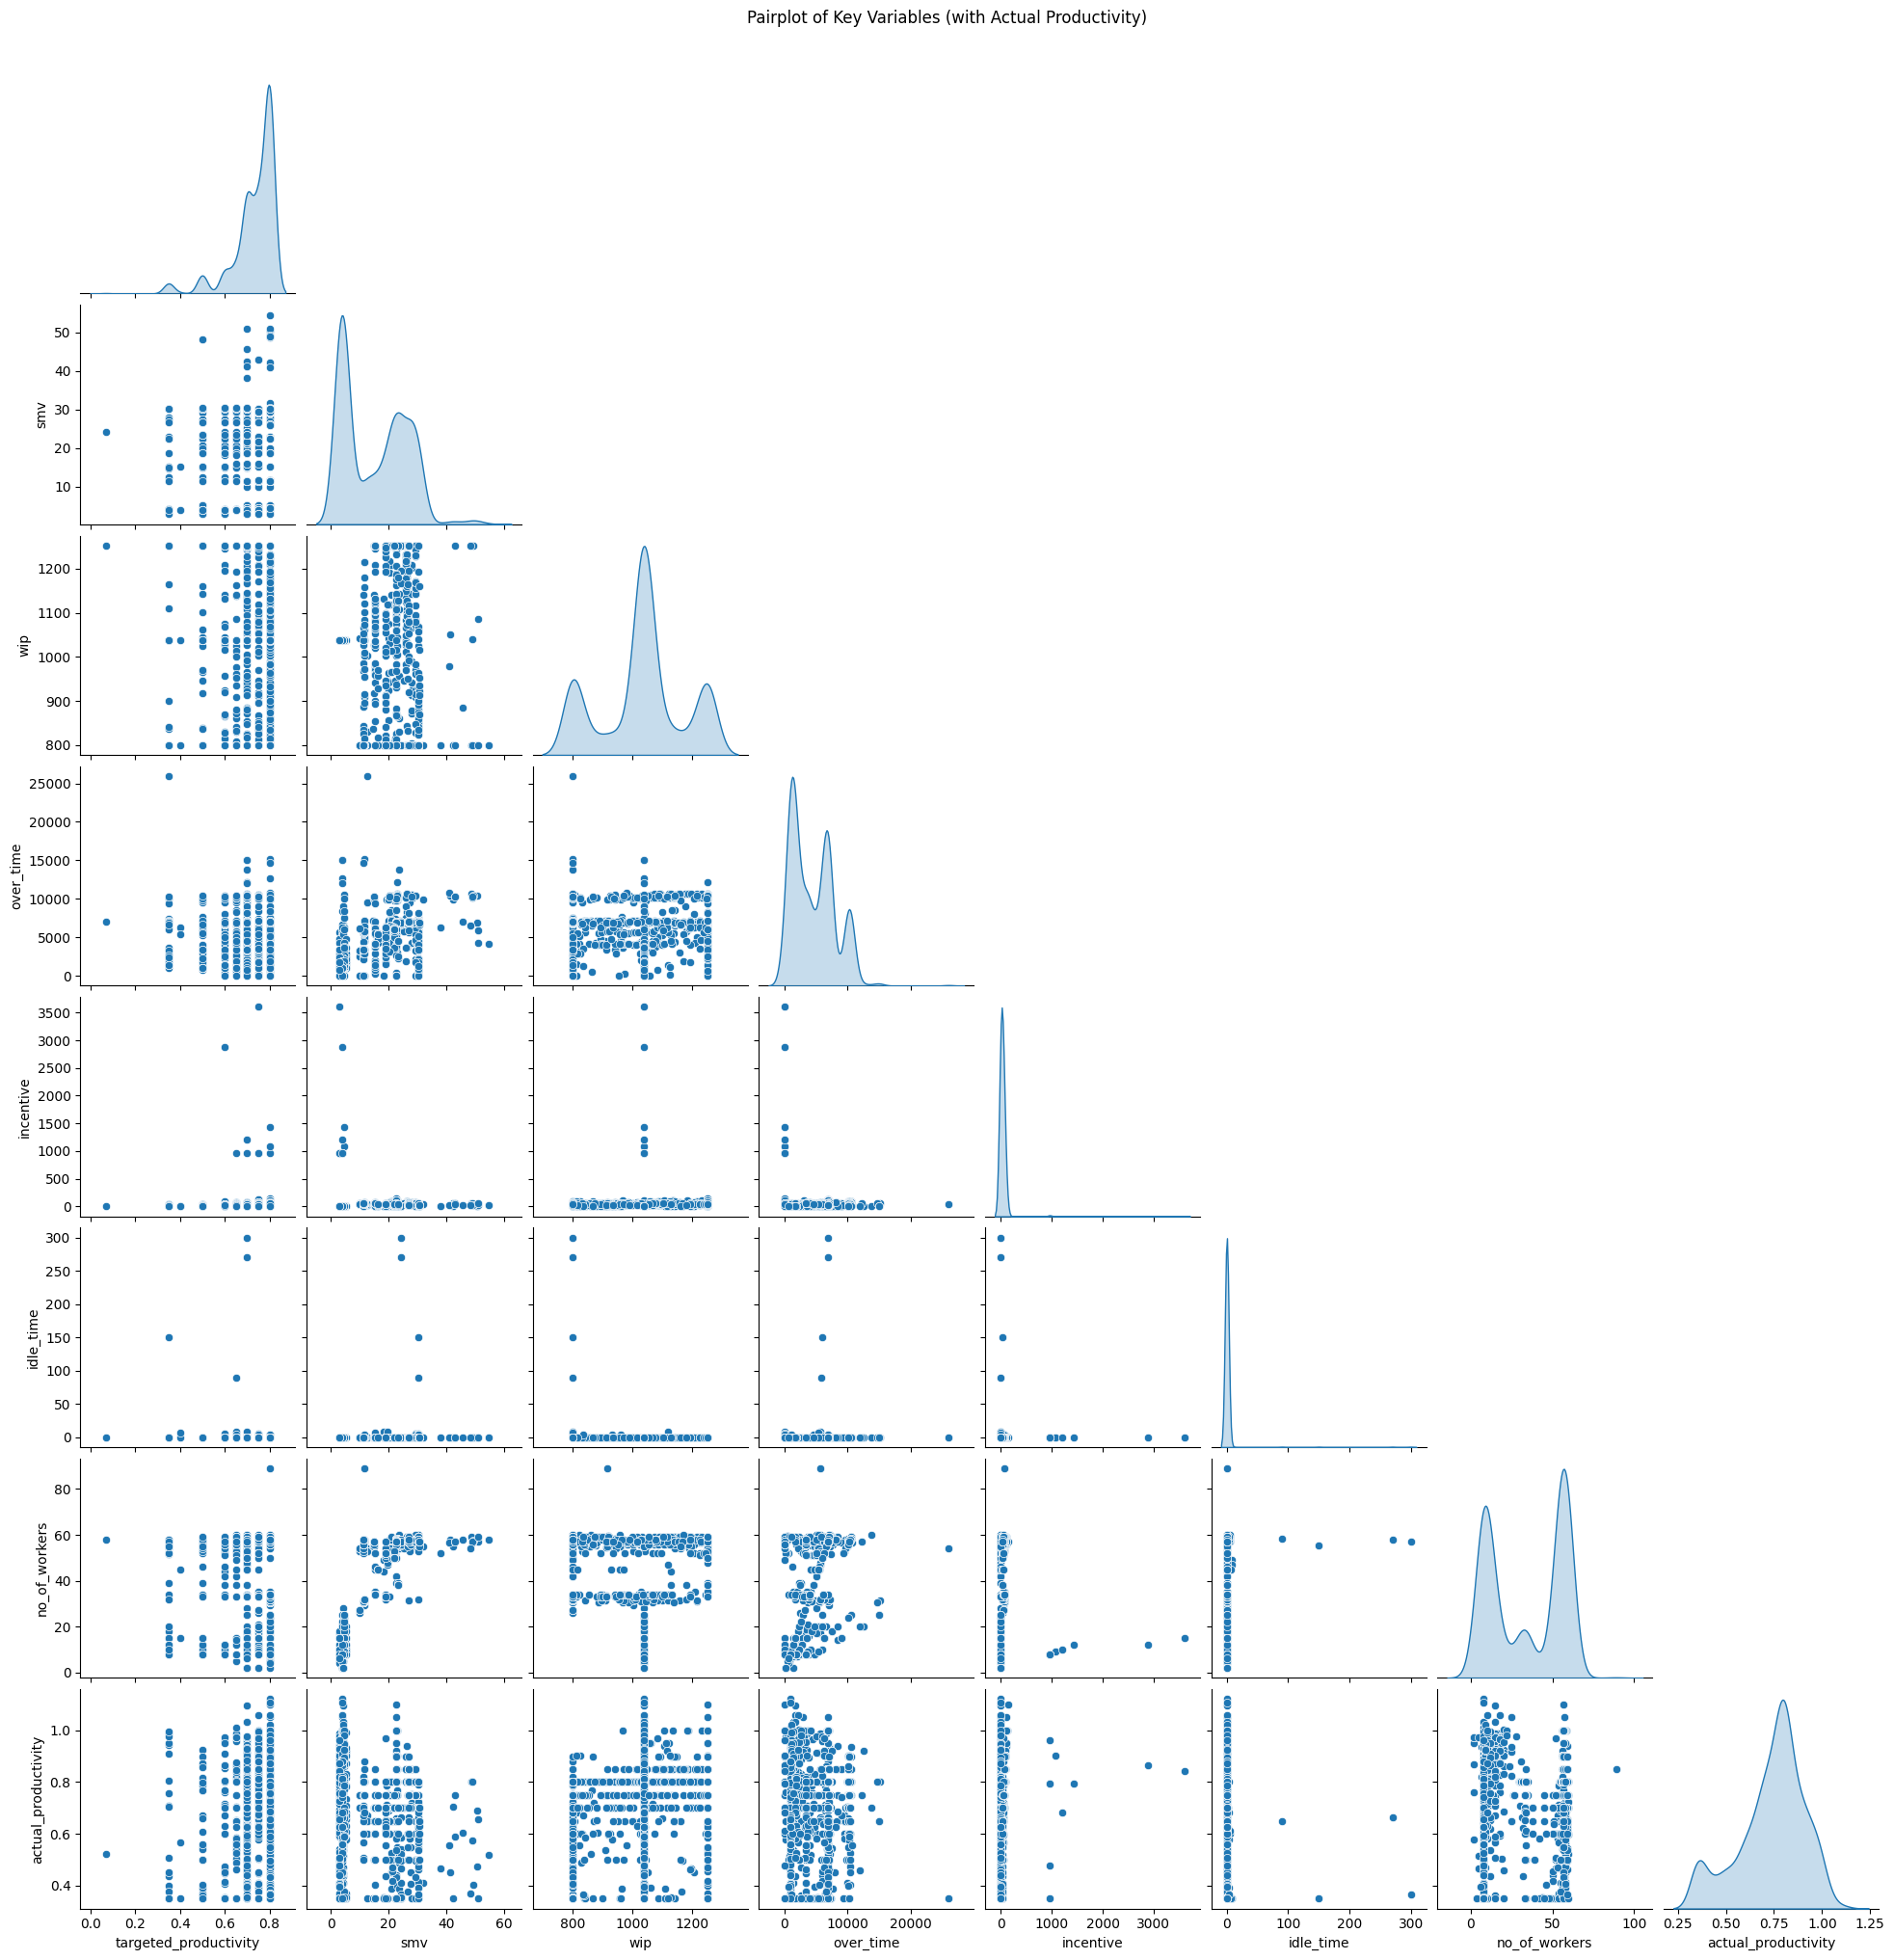

<ipython-input-45-59c184fa450b>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_data, x='quarter', y='actual_productivity', palette='pastel')


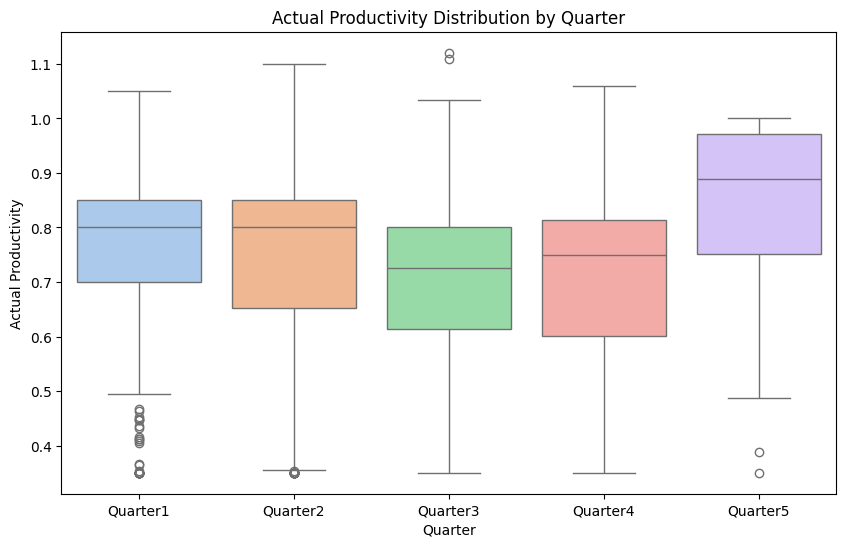

<ipython-input-45-59c184fa450b>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_data, x='department', y='actual_productivity', palette='Set2')


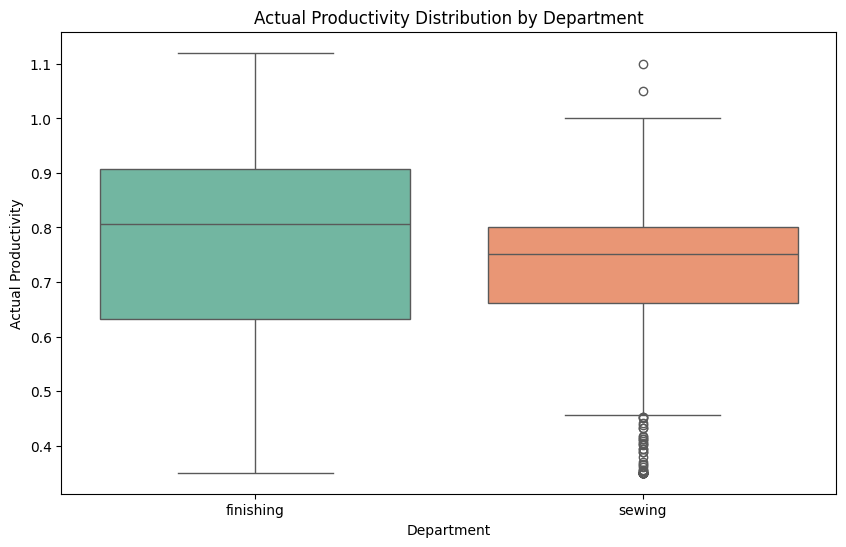

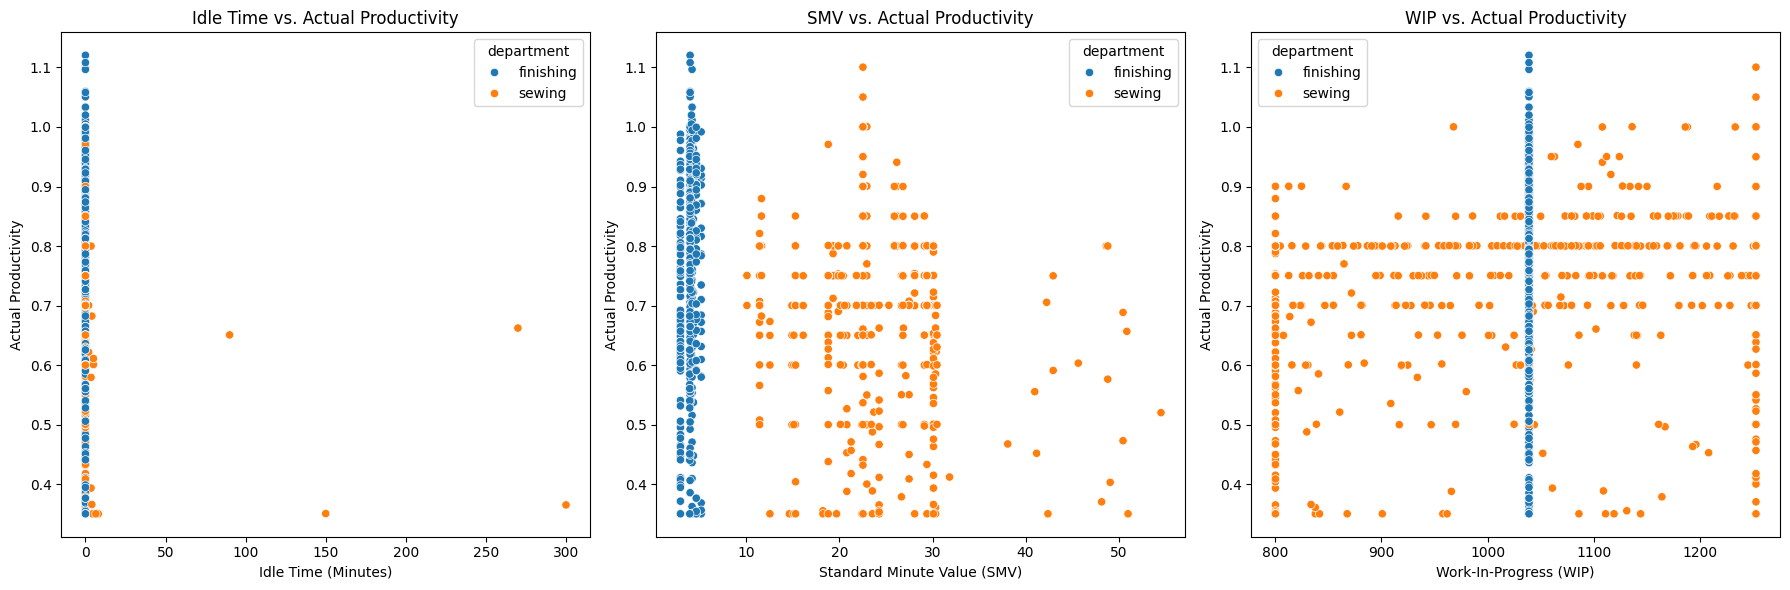

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cleaned_data' is your cleaned dataset

# 1. Remove non-numeric columns for correlation calculation
numeric_data = cleaned_data.select_dtypes(include=['number'])  # This selects only numeric columns

# 2. Correlation Heatmap to understand relationships between numeric variables
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

# 3. Pairplot to explore relationships between key numeric variables and actual productivity
key_numeric_variables = ['targeted_productivity', 'smv', 'wip', 'over_time',
                          'incentive', 'idle_time', 'no_of_workers', 'actual_productivity']

sns.pairplot(cleaned_data[key_numeric_variables], diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Key Variables (with Actual Productivity)', y=1.02)
plt.show()

# 4. Boxplot: Actual Productivity by Quarter
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data, x='quarter', y='actual_productivity', palette='pastel')
plt.title('Actual Productivity Distribution by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Actual Productivity')
plt.show()

# 5. Boxplot: Actual Productivity by Department
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data, x='department', y='actual_productivity', palette='Set2')
plt.title('Actual Productivity Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Actual Productivity')
plt.show()

# 6. Detailed Scatterplots: Idle Time, SMV, and WIP with Actual Productivity
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(ax=axes[0], data=cleaned_data, x='idle_time', y='actual_productivity', hue='department')
axes[0].set_title('Idle Time vs. Actual Productivity')
axes[0].set_xlabel('Idle Time (Minutes)')
axes[0].set_ylabel('Actual Productivity')

sns.scatterplot(ax=axes[1], data=cleaned_data, x='smv', y='actual_productivity', hue='department')
axes[1].set_title('SMV vs. Actual Productivity')
axes[1].set_xlabel('Standard Minute Value (SMV)')
axes[1].set_ylabel('Actual Productivity')

sns.scatterplot(ax=axes[2], data=cleaned_data, x='wip', y='actual_productivity', hue='department')
axes[2].set_title('WIP vs. Actual Productivity')
axes[2].set_xlabel('Work-In-Progress (WIP)')
axes[2].set_ylabel('Actual Productivity')

plt.tight_layout()
plt.show()


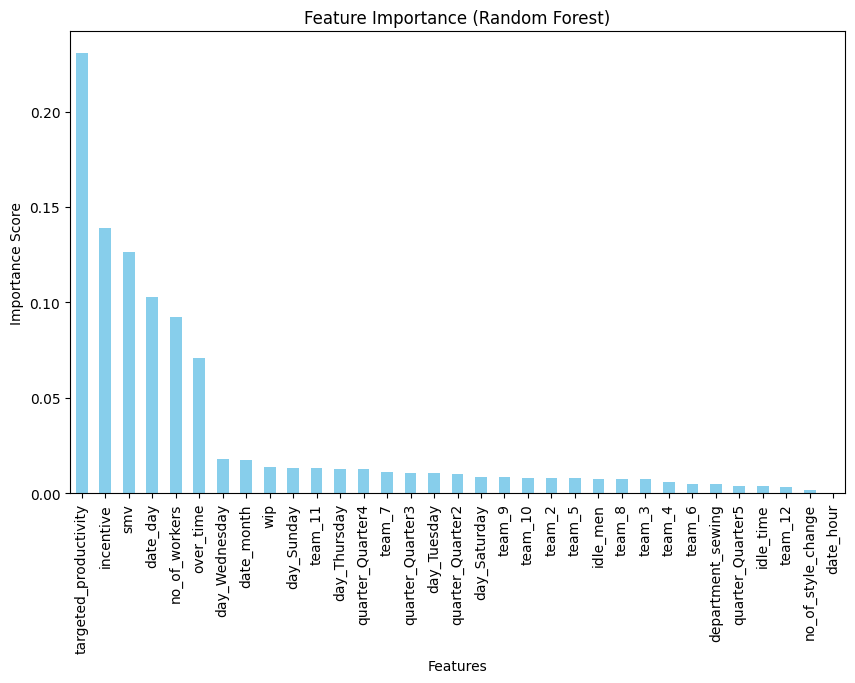

Top Features Selected by RFE: Index(['targeted_productivity', 'quarter_Quarter5', 'team_6', 'team_7',
       'team_8'],
      dtype='object')


In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Drop 'actual_productivity' for feature matrix and set target variable
X = cleaned_data.drop('actual_productivity', axis=1)
y = cleaned_data['actual_productivity']

# Convert boolean columns to integers
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)

# Handle datetime columns (if any exist)
datetime_cols = X.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    X[col + '_month'] = X[col].dt.month
    X[col + '_day'] = X[col].dt.day
    X[col + '_hour'] = X[col].dt.hour
X = X.drop(datetime_cols, axis=1)  # Drop the original datetime columns

# One-Hot Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train Random Forest to compute feature importance
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

# Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()

# Recursive Feature Elimination (RFE)
rfe_model = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe_model.fit(X, y)
selected_features = X.columns[rfe_model.support_]
print("Top Features Selected by RFE:", selected_features)


Skewness of targeted_productivity: -2.14


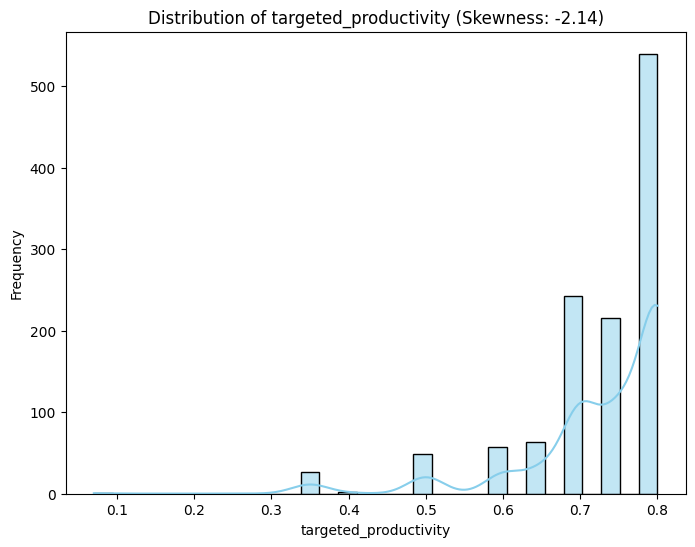

Skewness of smv: 0.41


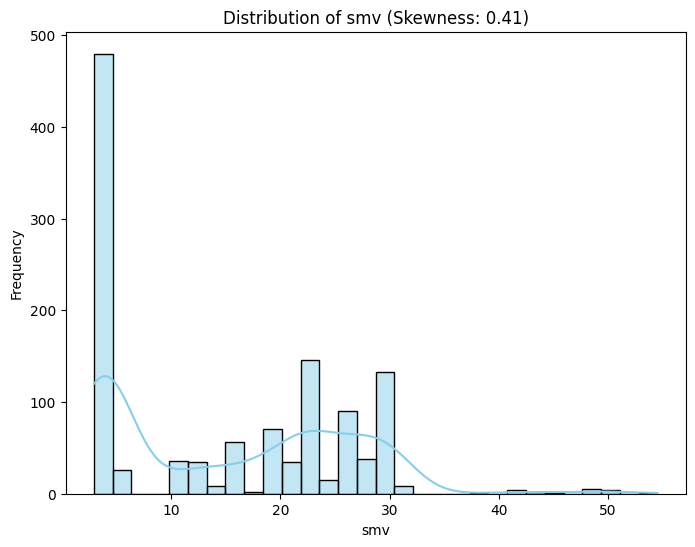

Skewness of wip: -0.14


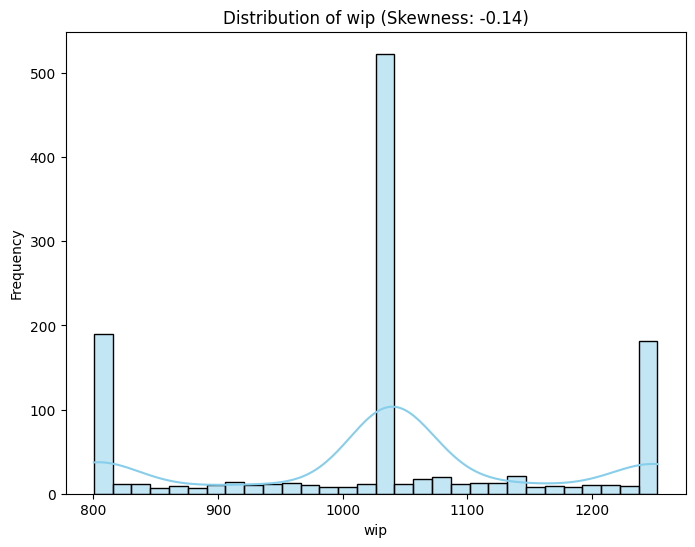

Skewness of over_time: 0.67


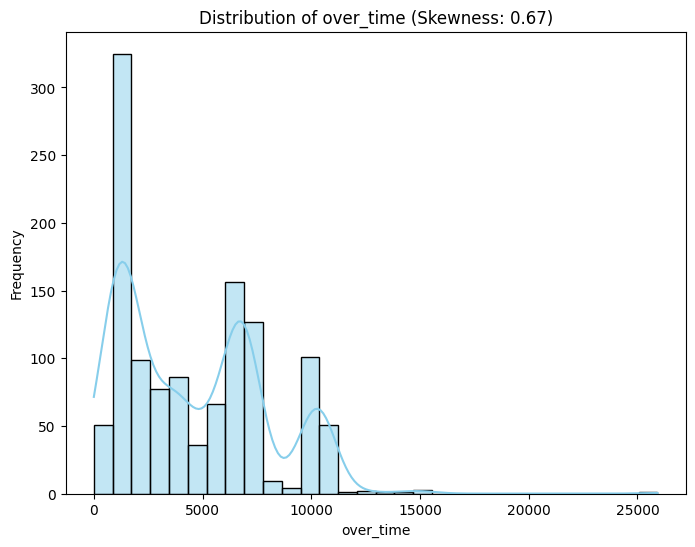

Skewness of incentive: 15.77


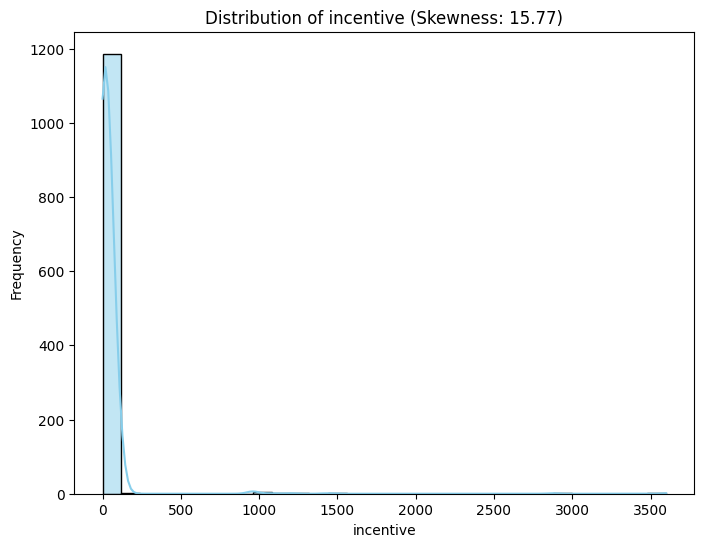

Skewness of idle_time: 20.52


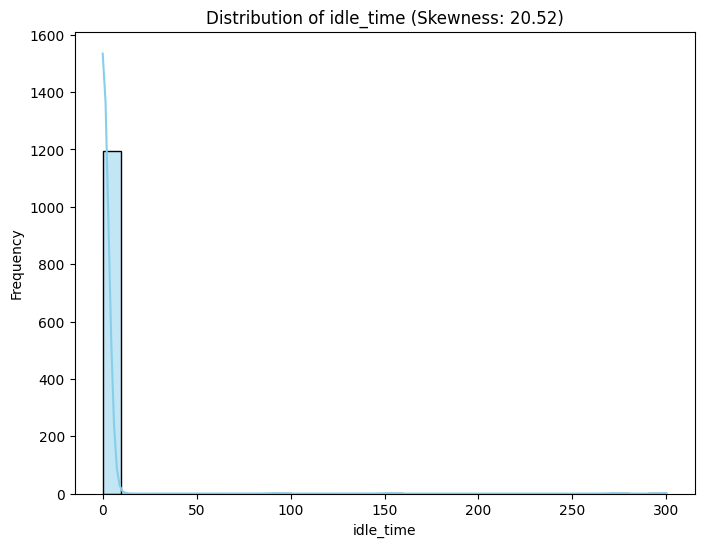

Skewness of idle_men: 9.84


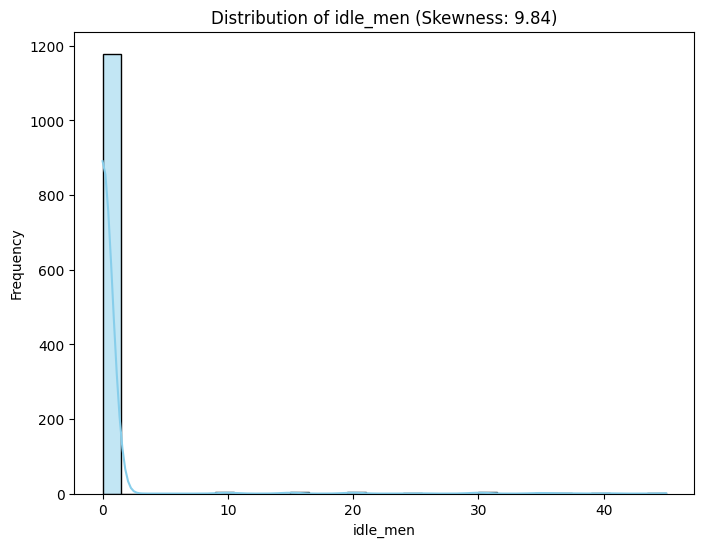

Skewness of no_of_style_change: 2.94


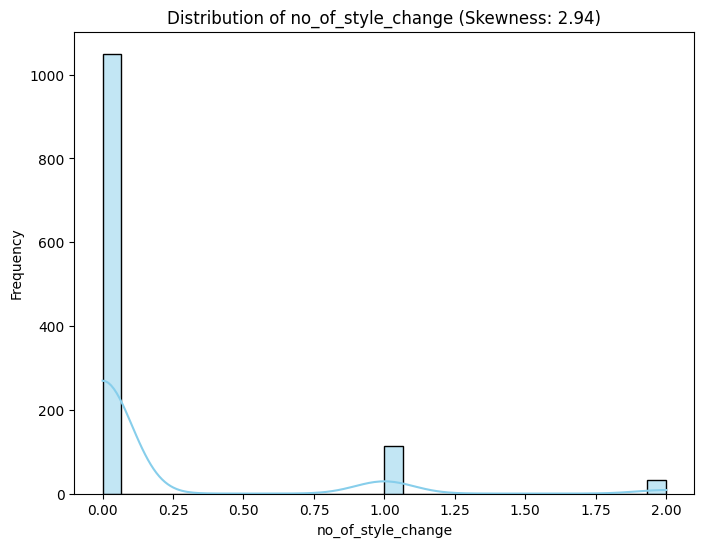

Skewness of no_of_workers: -0.11


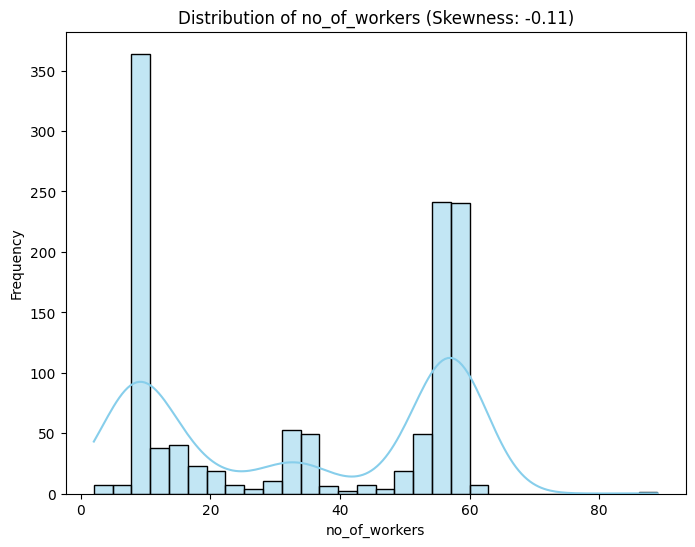

Skewness of actual_productivity: -0.67


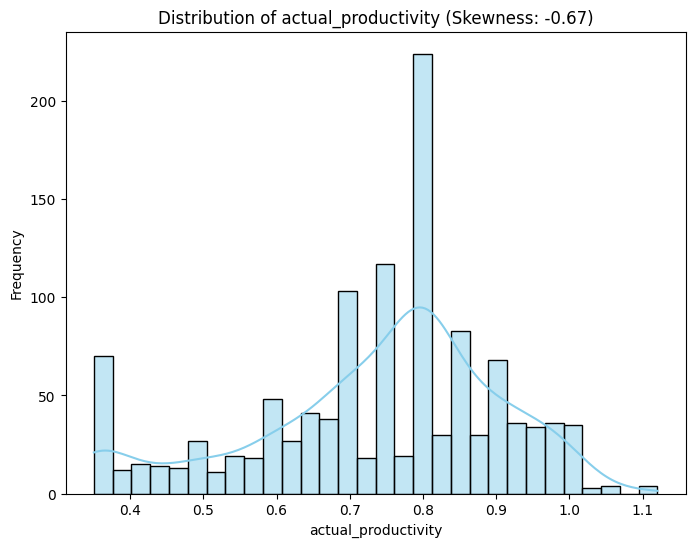

Kolom dengan skewness tinggi:
targeted_productivity    -2.144150
incentive                15.790746
idle_time                20.545425
idle_men                  9.855079
no_of_style_change        2.942506
dtype: float64


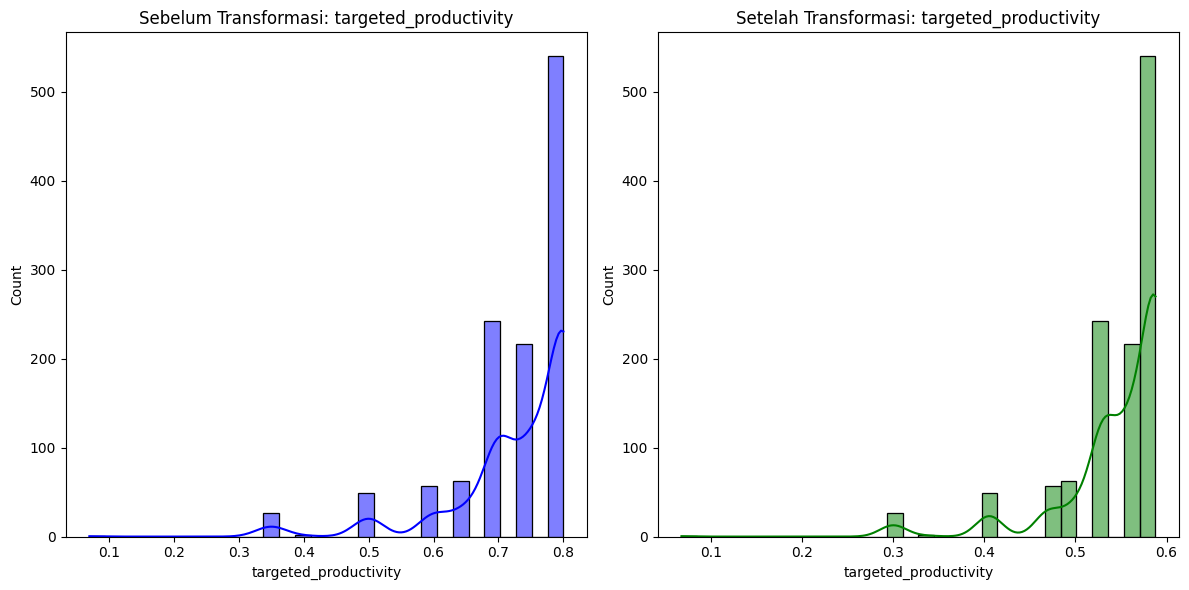

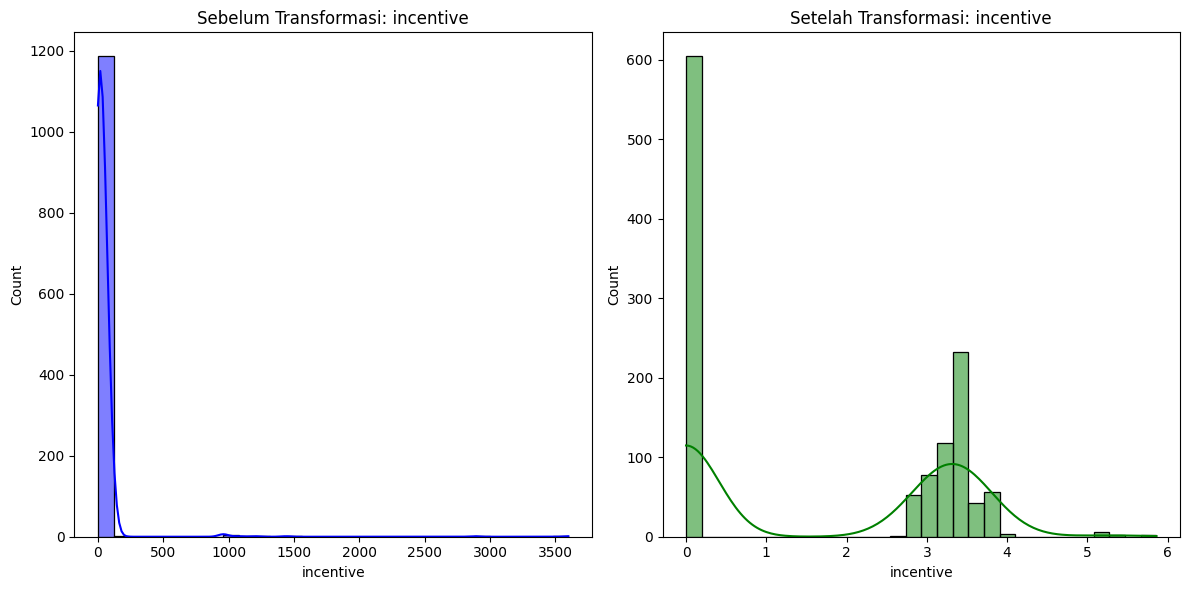

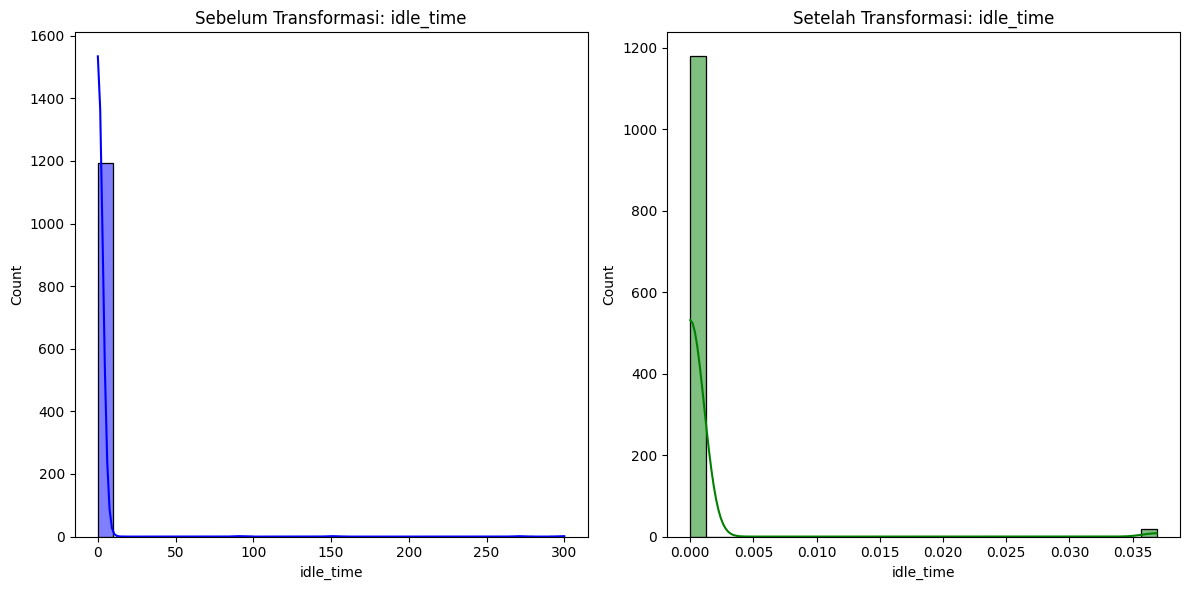

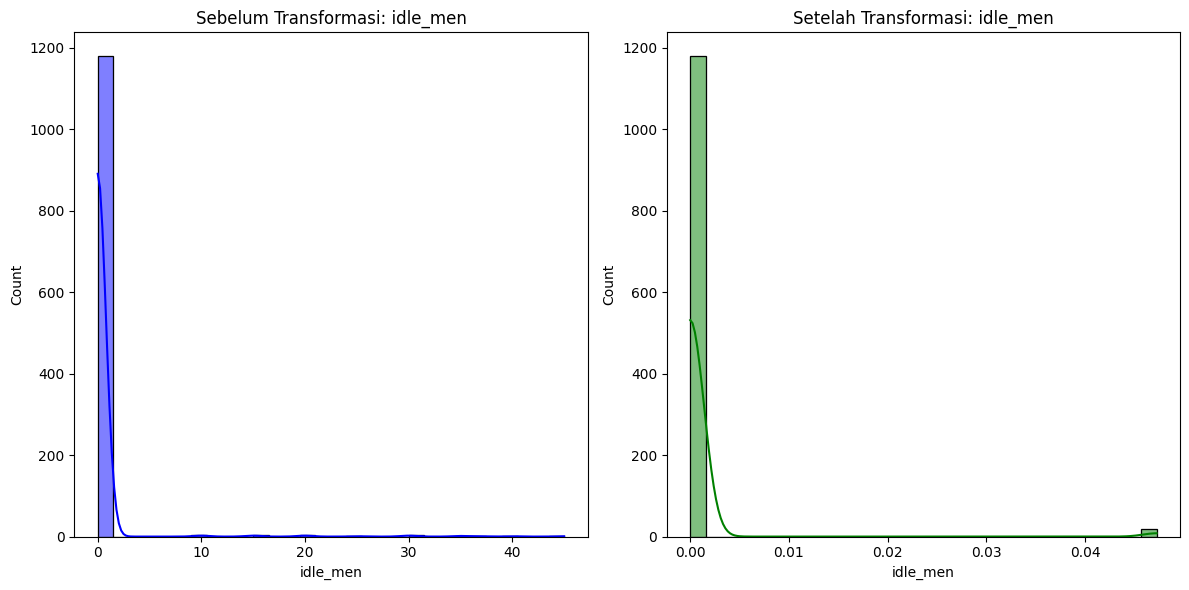

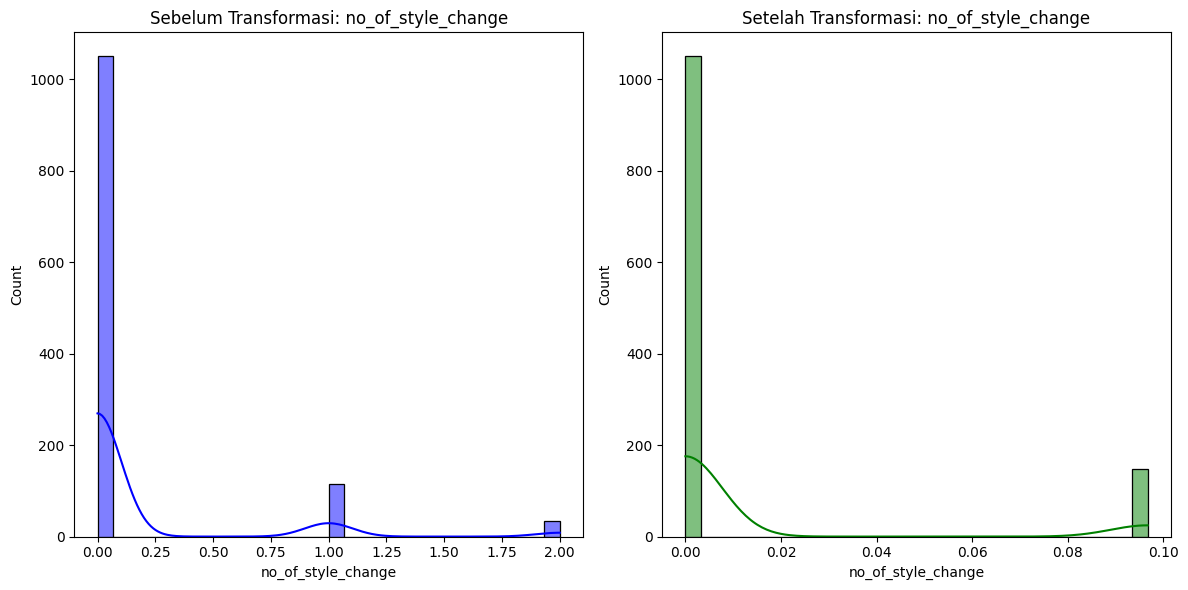

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

# Asumsi 'cleaned_data' adalah dataset yang sudah dibersihkan

# 1. Identifikasi kolom dengan skewness
skewed_columns = cleaned_data.select_dtypes(include=['number']).skew()
highly_skewed = skewed_columns[skewed_columns.abs() > 0.75].index  # Ambil kolom dengan skewness > 0.75

print("Kolom dengan skewness tinggi:")
print(skewed_columns[highly_skewed])

# 2. Terapkan transformasi log untuk mengatasi skewness
log_transformed_data = cleaned_data.copy()
for col in highly_skewed:
    if (log_transformed_data[col] > 0).all():  # Log transform hanya untuk data positif
        log_transformed_data[col] = np.log1p(log_transformed_data[col])  # log(1 + x)
    else:
        # Box-Cox transform untuk data dengan nilai negatif atau nol
        log_transformed_data[col], _ = boxcox(log_transformed_data[col] + abs(log_transformed_data[col].min()) + 1)

# 3. Visualisasi sebelum dan sesudah transformasi
for col in highly_skewed:
    plt.figure(figsize=(12, 6))

    # Sebelum transformasi
    plt.subplot(1, 2, 1)
    sns.histplot(cleaned_data[col], kde=True, color='blue', bins=30)
    plt.title(f'Sebelum Transformasi: {col}')
    plt.xlabel(col)

    # Setelah transformasi
    plt.subplot(1, 2, 2)
    sns.histplot(log_transformed_data[col], kde=True, color='green', bins=30)
    plt.title(f'Setelah Transformasi: {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


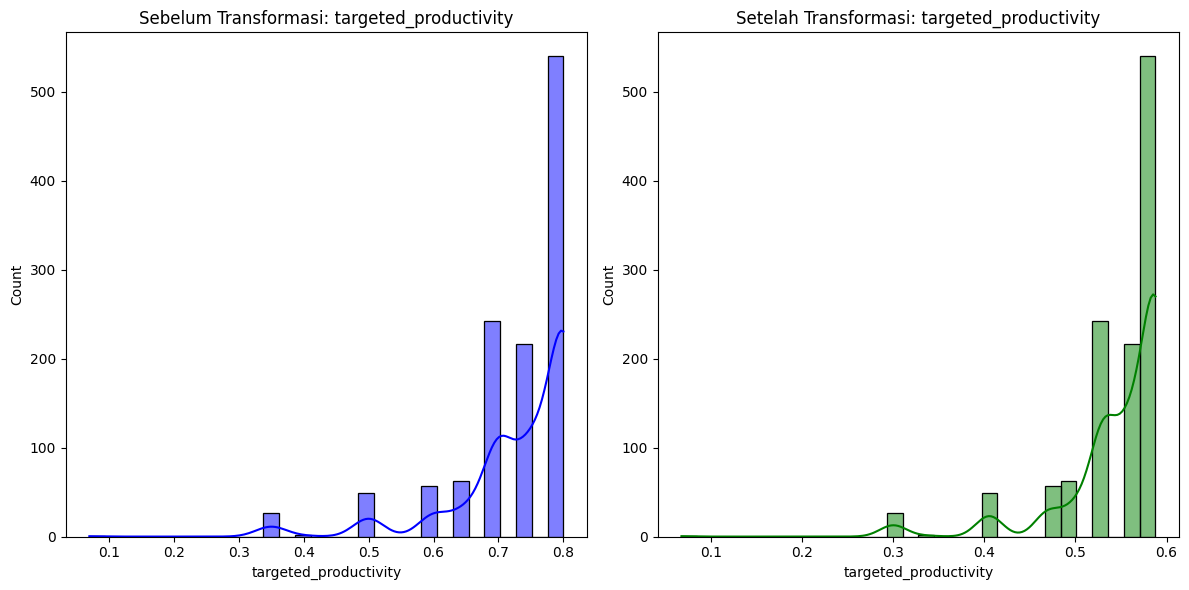

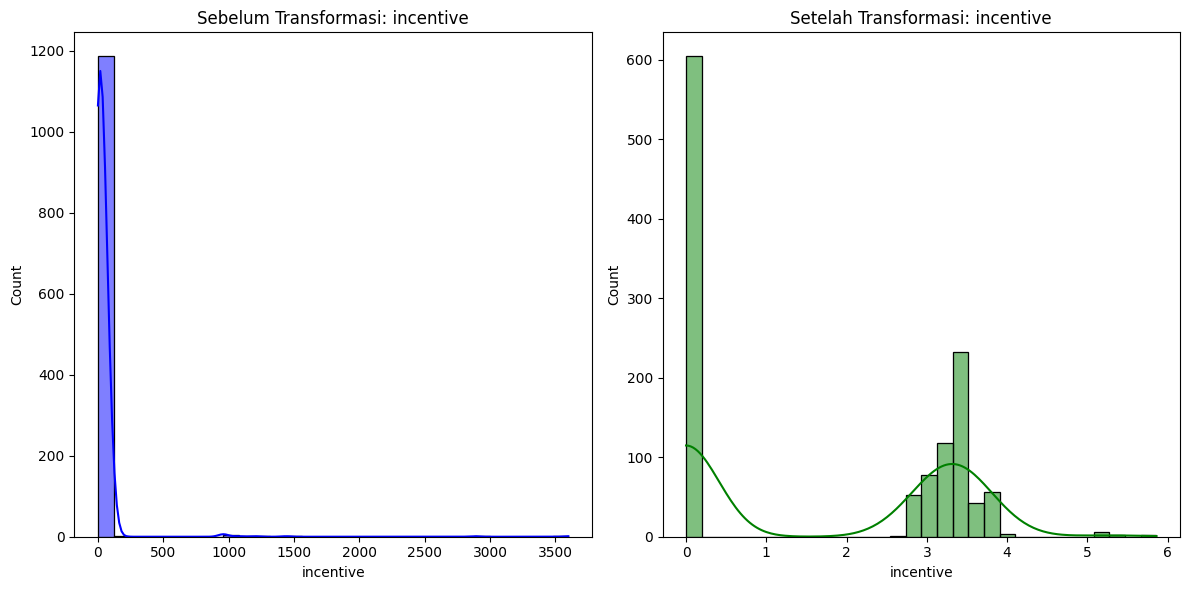

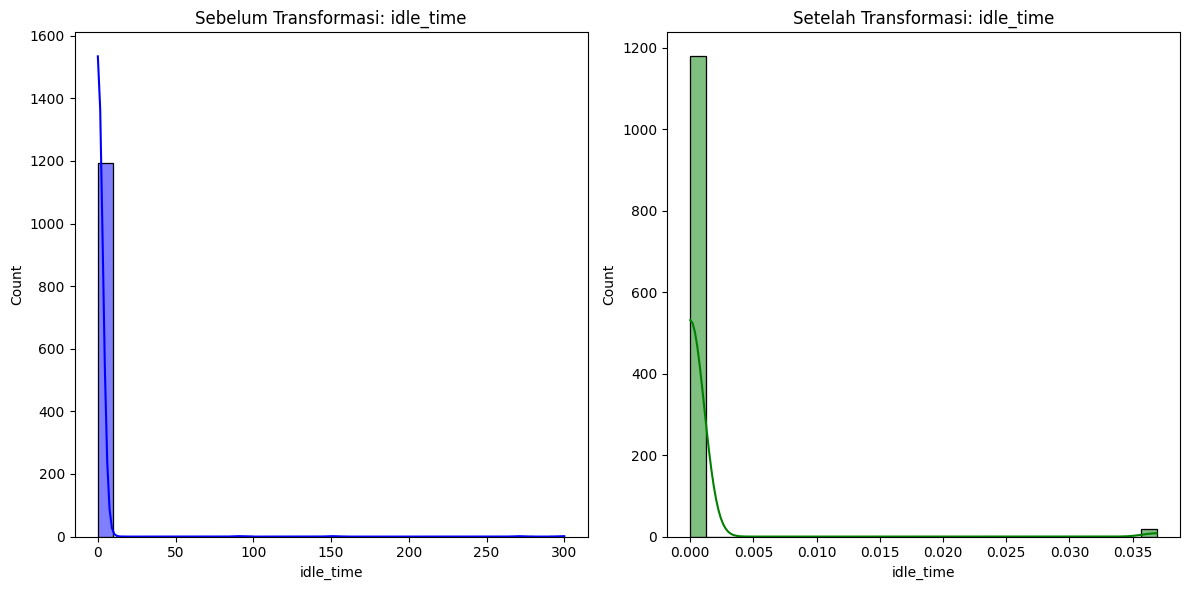

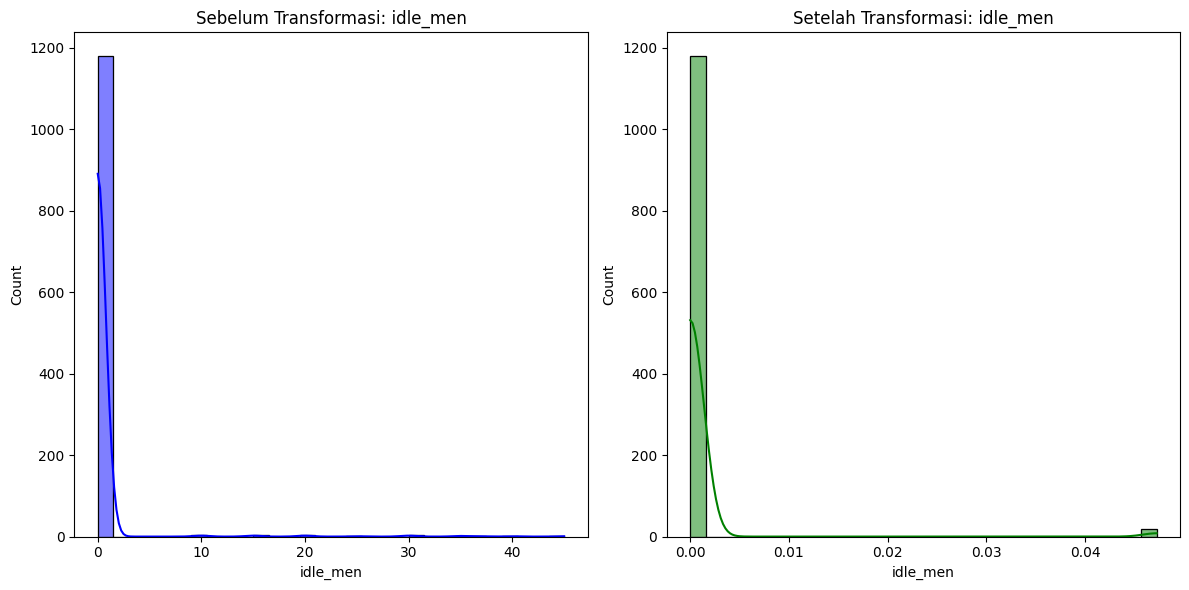

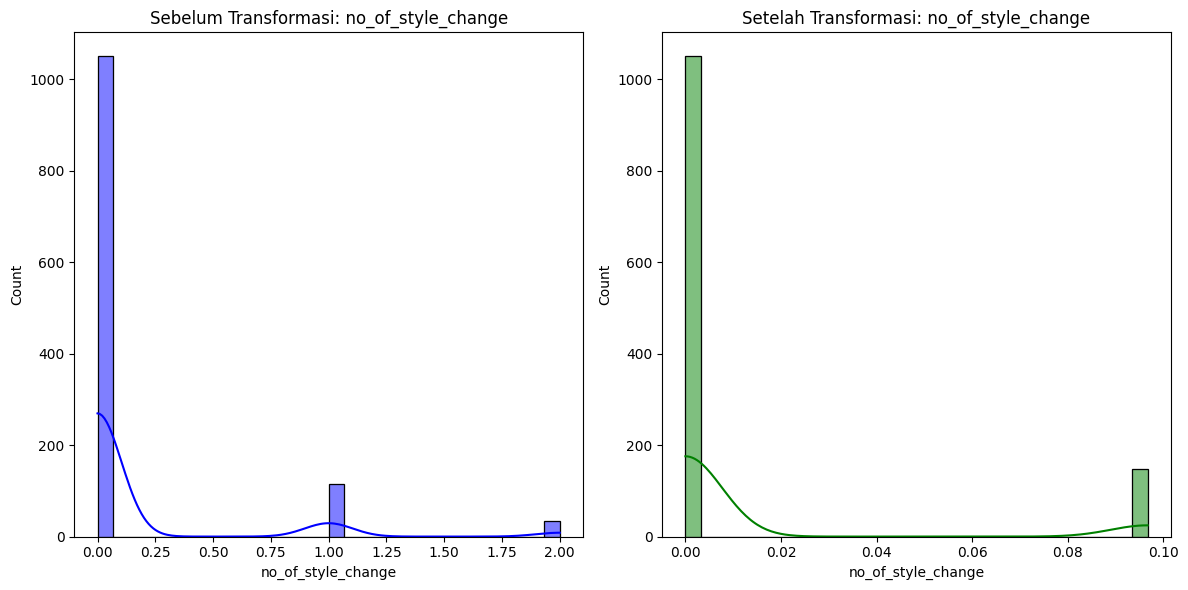

In [50]:
from scipy.stats import boxcox
import numpy as np

# Salin data asli untuk transformasi
transformed_data = cleaned_data.copy()

# Kolom dengan skewness tinggi
skewed_columns = ['targeted_productivity', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change']

# Terapkan log transform atau Box-Cox untuk mengatasi skewness
for col in skewed_columns:
    if transformed_data[col].min() > 0:  # Log transform hanya untuk data positif
        transformed_data[col] = np.log1p(transformed_data[col])  # log(1 + x)
    else:
        # Box-Cox transformasi untuk data dengan nilai negatif atau nol
        transformed_data[col], _ = boxcox(transformed_data[col] + abs(transformed_data[col].min()) + 1)

# Visualisasi sebelum dan setelah transformasi
import matplotlib.pyplot as plt
import seaborn as sns

for col in skewed_columns:
    plt.figure(figsize=(12, 6))

    # Sebelum transformasi
    plt.subplot(1, 2, 1)
    sns.histplot(cleaned_data[col], kde=True, color='blue', bins=30)
    plt.title(f'Sebelum Transformasi: {col}')
    plt.xlabel(col)

    # Setelah transformasi
    plt.subplot(1, 2, 2)
    sns.histplot(transformed_data[col], kde=True, color='green', bins=30)
    plt.title(f'Setelah Transformasi: {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


In [68]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np


# Separate features and target variable
X = data.drop('actual_productivity', axis=1)
y = data['actual_productivity']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Baseline: Linear Regression": LinearRegression(),
    "Baseline: KNN": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "SVM (RBF)": SVR(kernel='rbf'),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=1000)
}

# Dictionary to store results
metrics = []

# Loop through each model
for model_name, model in models.items():
    # Cross-validation RMSE
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())

    # Fit the model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute metrics
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_mae = mean_absolute_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    # Store the metrics
    metrics.append({
        "Model": model_name,
        "CV RMSE": cv_rmse,
        "Test RMSE": test_rmse,
        "Test MAE": test_mae,
        "Test R2": test_r2
    })

# Convert metrics to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)
metrics_df


,Model,CV RMSE,Test RMSE,Test MAE,Test R2
0,Baseline: Linear Regression,0.334949,0.331799,0.293743,-0.115179
1,Baseline: KNN,0.333546,0.314572,0.286293,-0.002384
2,Random Forest,0.337784,0.342476,0.312693,-0.188105
3,Decision Tree,0.445054,0.379628,0.326064,-0.459863
4,SVM (RBF),0.322404,0.339415,0.307836,-0.166962
5,MLP Regressor,0.723923,0.665424,0.534935,-3.485300


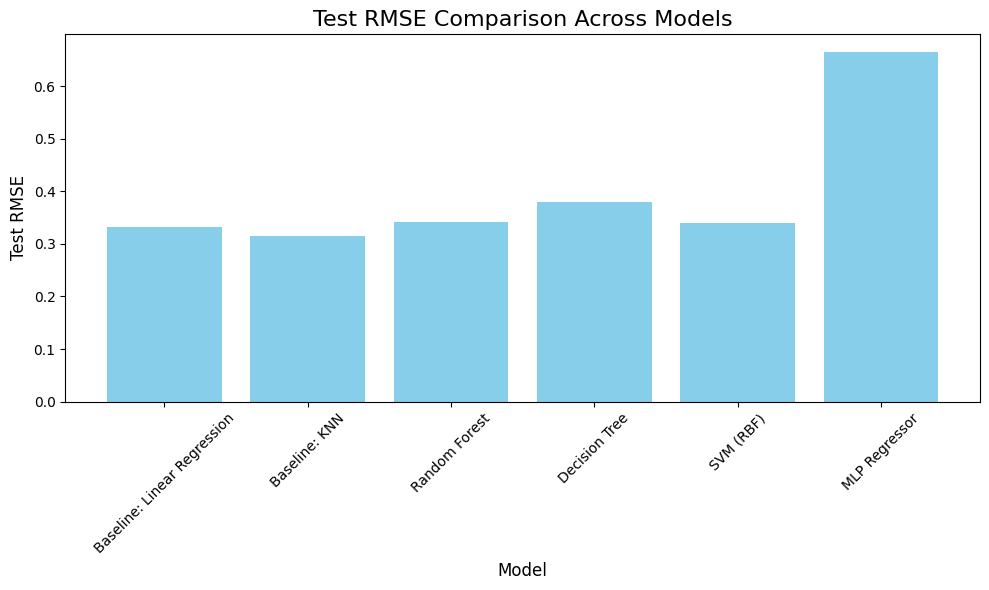

In [59]:
import matplotlib.pyplot as plt

# Bar plot for Test RMSE comparison
plt.figure(figsize=(10, 6))
plt.bar(metrics_df["Model"], metrics_df["Test RMSE"], color='skyblue')
plt.title("Test RMSE Comparison Across Models", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Test RMSE", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [69]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

param_grid_dt = {
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Random Forest
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

# Display best parameters
print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Best Decision Tree Parameters:", grid_dt.best_params_)


Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best Decision Tree Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


Linear Regression Coefficients:
          Feature  Coefficient
9     day_Tuesday     0.048214
0        bool_col     0.017943
1             wip     0.016680
4      quarter_Q2     0.015596
10  day_Wednesday     0.015225
2           month     0.009684
7    department_B    -0.015516
5      quarter_Q3    -0.015640
3    day_of_month    -0.018199
6      quarter_Q4    -0.018529
8    department_C    -0.043057

Generating SHAP Summary Plot...


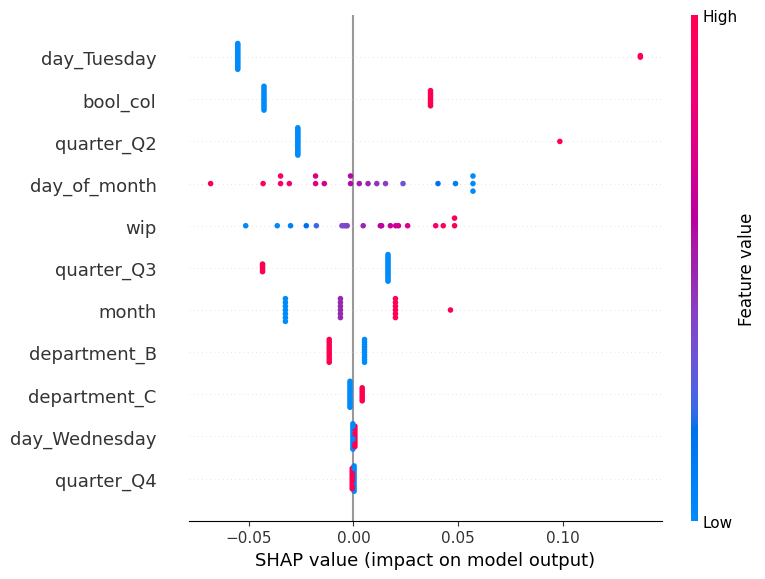


Linear Regression Evaluation Metrics:
RMSE: 0.3318
MAE: 0.2937
R^2: -0.1152

SGD Regressor Evaluation Metrics:
RMSE: 0.3342
MAE: 0.2908
R^2: -0.1312

SVM (Linear) Evaluation Metrics:
RMSE: 0.3469
MAE: 0.2976
R^2: -0.2188


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.34686488362424767, 0.2976340376197173, -0.2187517508488941)

In [61]:
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import shap

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression (Baseline)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Get coefficients for Linear Regression
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)
print("Linear Regression Coefficients:")
print(coefficients)

# Alternative: SGDRegressor for faster fitting on large datasets
sgd = SGDRegressor()
sgd.fit(X_train_scaled, y_train)

# SVM with SHAP Interpretation
svr = SVR(kernel='linear', C=1.0, epsilon=0.1)  # Adjust hyperparameters for efficiency
svr.fit(X_train_scaled, y_train)

# SHAP Analysis
explainer = shap.LinearExplainer(svr, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

# SHAP Summary Plot
print("\nGenerating SHAP Summary Plot...")
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_train.columns)

# Evaluate Models
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{model_name} Evaluation Metrics:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R^2: {r2:.4f}")
    return rmse, mae, r2

# Evaluate Linear Regression
evaluate_model(lr, X_test_scaled, y_test, "Linear Regression")

# Evaluate SGDRegressor
evaluate_model(sgd, X_test_scaled, y_test, "SGD Regressor")

# Evaluate SVM
evaluate_model(svr, X_test_scaled, y_test, "SVM (Linear)")



In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Optimized loop for model evaluation
metrics = []
for name, model in models.items():
    # Cross-validation RMSE (3 folds, parallelized)
    cv_scores = cross_val_score(
        model, X_train, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1
    )
    cv_rmse = np.sqrt(-cv_scores.mean())

    # Test metrics
    model.fit(X_train, y_train)  # Fit the model
    y_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_mae = mean_absolute_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    # Store metrics
    metrics.append({
        "Model": name,
        "CV RMSE": cv_rmse,
        "Test RMSE": test_rmse,
        "Test MAE": test_mae,
        "Test R2": test_r2
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


                         Model   CV RMSE  Test RMSE  Test MAE   Test R2
0  Baseline: Linear Regression  0.323187   0.331799  0.293743 -0.115179
1                Baseline: KNN  0.303856   0.314572  0.286293 -0.002384
2                Random Forest  0.326871   0.342476  0.312693 -0.188105
3                Decision Tree  0.440736   0.379628  0.326064 -0.459863
4                    SVM (RBF)  0.301296   0.339415  0.307836 -0.166962
5                MLP Regressor  0.723185   0.665424  0.534935 -3.485300


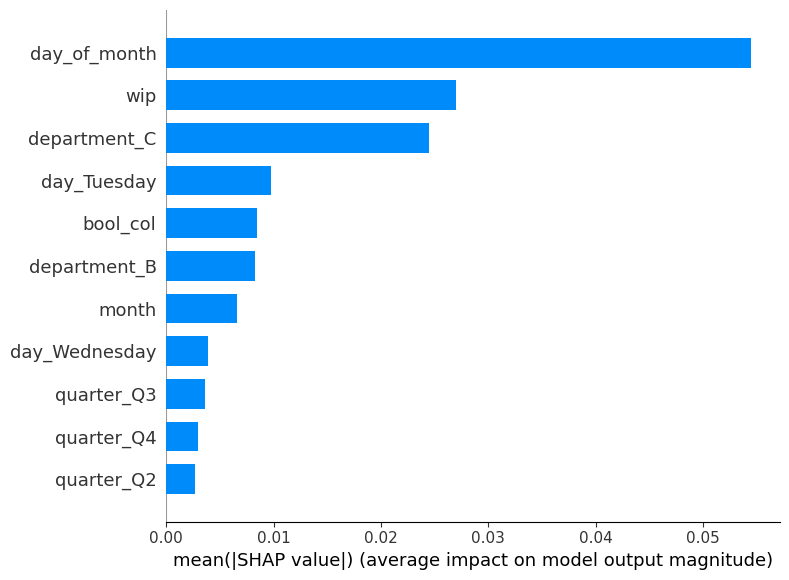

In [63]:
import shap

# Fit the best model
best_rf.fit(X_train, y_train)

# SHAP Explainer
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

# Visualize feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")


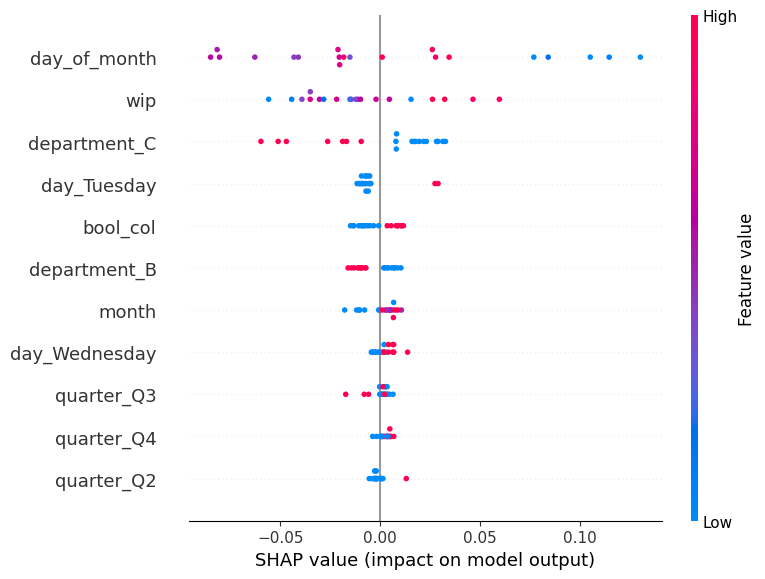

ValueError: Could not find feature named: targeted_productivity

In [64]:
# SHAP Summary Plot for all features
shap.summary_plot(shap_values, X_test)

# SHAP Dependence Plot for a specific feature
shap.dependence_plot("targeted_productivity", shap_values, X_test)
